In [150]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.get_cachedir()

'C:\\Users\\owner231128a\\.matplotlib'

In [151]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔바른고딕 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 01. 고객 클러스터링
투자자와 비슷한 자산 규모 및 연령대, 투자 성향을 가진 기존 투자자가 투자를 어떻게 했는지에 대한 경향성 과거 데이터를 제시하고자 한다. 따라서 연령대, 투자성향, 자산규모를 가지고 고객 클러스터링을 진행한다.

In [152]:
# 고객보유정보 데이터 불러오기
CUS_TP_IFO = pd.read_csv("C:/Users/owner231128a/Downloads/open/NH_CONTEST_NHDATA_CUS_TP_IFO.csv", encoding="UTF-8", on_bad_lines='skip')
CUS_TP_IFO

,bse_dt,tck_iem_cd,cus_cgr_llf_cd,cus_cgr_mlf_cd,cus_cgr_act_cnt_rt,cus_cgr_ivs_rt
0,20240826,AAL,2,22,37.2608,37.5675
1,20240826,AAL,2,25,4.8405,11.8565
2,20240826,AAL,2,21,21.4259,11.5923
3,20240826,AAL,2,23,23.9400,21.7531
4,20240816,AAL,2,21,21.4740,11.7051
...,...,...,...,...,...,...
1194995,20240612,ZS,2,24,25.3165,23.7650
1194996,20240529,ZS,3,31,36.8421,11.7457
1194997,20240819,ZS,2,21,14.7059,7.2295
1194998,20240819,ZS,2,23,28.8235,25.3286


In [153]:
# 종목일자별시세 데이터 불러오기
STK_DT_QUT = pd.read_csv("C:/Users/owner231128a/Downloads/open/NH_CONTEST_STK_DT_QUT.csv", encoding="UTF-8", on_bad_lines='skip')
STK_DT_QUT

,bse_dt,tck_iem_cd,iem_ong_pr,iem_hi_pr,iem_low_pr,iem_end_pr,bf_dd_cmp_ind_pr,bf_dd_cmp_ind_rt,acl_trd_qty,trd_cst,sll_cns_sum_qty,byn_cns_sum_qty,sby_bse_xcg_rt
0,20240722,AAL,10.49,10.7400,10.3500,10.69,0.11,1.04,38895463.0,414252965.0,0.0,0.0,1386.6
1,20240603,AAL,11.60,11.9450,11.5000,11.53,0.03,0.26,52899042.0,609925954.0,27221369.0,25722473.0,1381.6
2,20240531,AAL,11.51,11.5700,11.2500,11.50,0.06,0.52,60868405.0,699986658.0,28279620.0,32588785.0,1376.5
3,20240625,AAL,11.18,11.3650,11.1200,11.13,-0.03,-0.27,28547274.0,317731160.0,17399022.0,11148252.0,1389.7
4,20240605,AAL,11.51,11.7650,11.4500,11.62,0.12,1.04,34340914.0,399041421.0,17637074.0,16703939.0,1373.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194826,20240702,ZS,197.60,199.3747,194.7084,196.66,-1.96,-0.99,1725207.0,339904669.0,0.0,0.0,1380.8
194827,20240807,ZS,171.14,174.7700,166.0600,166.20,0.45,0.27,1362130.0,231882881.0,879205.0,878868.0,1372.2
194828,20240617,ZS,183.00,185.5800,180.7600,184.38,0.16,0.09,1790442.0,328666782.0,720798.0,1069644.0,1377.7
194829,20240815,ZS,186.81,191.6200,184.9800,190.34,6.36,3.46,1583690.0,300663546.0,1127670.0,990550.0,1370.3


In [154]:
# 필요한 열만 선택하여 새로운 데이터프레임 생성하기
STK_DT_QUT_selected = STK_DT_QUT[['bse_dt', 'tck_iem_cd', 'bf_dd_cmp_ind_rt']]
print(STK_DT_QUT_selected)

          bse_dt    tck_iem_cd  bf_dd_cmp_ind_rt
0       20240722  AAL                       1.04
1       20240603  AAL                       0.26
2       20240531  AAL                       0.52
3       20240625  AAL                      -0.27
4       20240605  AAL                       1.04
...          ...           ...               ...
194826  20240702  ZS                       -0.99
194827  20240807  ZS                        0.27
194828  20240617  ZS                        0.09
194829  20240815  ZS                        3.46
194830  20240715  ZS                        1.27

[194831 rows x 3 columns]


In [155]:
custom_df = pd.merge(CUS_TP_IFO, STK_DT_QUT_selected, on=['tck_iem_cd','bse_dt'], how='inner')
custom_df

,bse_dt,tck_iem_cd,cus_cgr_llf_cd,cus_cgr_mlf_cd,cus_cgr_act_cnt_rt,cus_cgr_ivs_rt,bf_dd_cmp_ind_rt
0,20240826,AAL,2,22,37.2608,37.5675,-1.73
1,20240826,AAL,2,25,4.8405,11.8565,-1.73
2,20240826,AAL,2,21,21.4259,11.5923,-1.73
3,20240826,AAL,2,23,23.9400,21.7531,-1.73
4,20240816,AAL,2,21,21.4740,11.7051,-0.40
...,...,...,...,...,...,...,...
1156767,20240612,ZS,2,24,25.3165,23.7650,0.63
1156768,20240529,ZS,3,31,36.8421,11.7457,0.13
1156769,20240819,ZS,2,21,14.7059,7.2295,1.35
1156770,20240819,ZS,2,23,28.8235,25.3286,1.35


In [156]:
custom_df.rename(columns={'bse_dt': '기준일자', 'tck_iem_cd': '티커종목코드','cus_cgr_llf_cd':'고객구성대분류코드','cus_cgr_mlf_cd':'고객구성중분류코드','cus_cgr_act_cnt_rt':'고객구성계좌수비율','cus_cgr_ivs_rt':'고객구성투자비율','bf_dd_cmp_ind_rt':'전일대비증감율'}, inplace=True)
custom_df

,기준일자,티커종목코드,고객구성대분류코드,고객구성중분류코드,고객구성계좌수비율,고객구성투자비율,전일대비증감율
0,20240826,AAL,2,22,37.2608,37.5675,-1.73
1,20240826,AAL,2,25,4.8405,11.8565,-1.73
2,20240826,AAL,2,21,21.4259,11.5923,-1.73
3,20240826,AAL,2,23,23.9400,21.7531,-1.73
4,20240816,AAL,2,21,21.4740,11.7051,-0.40
...,...,...,...,...,...,...,...
1156767,20240612,ZS,2,24,25.3165,23.7650,0.63
1156768,20240529,ZS,3,31,36.8421,11.7457,0.13
1156769,20240819,ZS,2,21,14.7059,7.2295,1.35
1156770,20240819,ZS,2,23,28.8235,25.3286,1.35


In [157]:
# 중복된 행 확인
duplicate_rows = custom_df[custom_df.duplicated()]

# 중복된 행 출력
if not duplicate_rows.empty:
    print("중복된 행이 발견되었습니다:")
    print(duplicate_rows)
else:
    print("중복된 행이 없습니다.")

중복된 행이 없습니다.


In [158]:
#결측치 확인
print(custom_df.isnull().sum())

기준일자         0
티커종목코드       0
고객구성대분류코드    0
고객구성중분류코드    0
고객구성계좌수비율    0
고객구성투자비율     0
전일대비증감율      0
dtype: int64


In [159]:
# 기초 통계 정보 확인
print(custom_df.describe())

               기준일자     고객구성대분류코드     고객구성중분류코드     고객구성계좌수비율      고객구성투자비율  \
count  1.156772e+06  1.156772e+06  1.156772e+06  1.156772e+06  1.156772e+06   
mean   2.024070e+07  2.172727e+00  2.413098e+01  3.790333e+01  3.791055e+01   
std    8.776744e+01  7.089813e-01  7.251855e+00  3.159854e+01  3.491561e+01   
min    2.024053e+07  1.000000e+00  1.100000e+01  2.050000e-02  2.000000e-04   
25%    2.024062e+07  2.000000e+00  2.100000e+01  1.428570e+01  8.930575e+00   
50%    2.024071e+07  2.000000e+00  2.400000e+01  2.727270e+01  2.499950e+01   
75%    2.024080e+07  3.000000e+00  3.100000e+01  5.000000e+01  6.326588e+01   
max    2.024083e+07  3.000000e+00  3.400000e+01  1.000000e+02  1.000000e+02   

            전일대비증감율  
count  1.156772e+06  
mean   6.201791e-02  
std    3.547100e+00  
min   -7.600000e+01  
25%   -1.290000e+00  
50%    4.000000e-02  
75%    1.350000e+00  
max    2.720600e+02  


In [160]:
# 고객구성대분류코드가 '연령대'인 데이터 필터링
age_data = custom_df[custom_df['고객구성대분류코드'] == 2]

# 연령대별 계좌수 비율과 투자 비율 평균을 계산
age_group = age_data.groupby('고객구성중분류코드')[['고객구성계좌수비율', '고객구성투자비율']].mean()

# 고객구성대분류코드가 '자산규모'인 데이터 필터링
asset_data = custom_df[custom_df['고객구성대분류코드'] == 3]

# 자산규모별 계좌수 비율과 투자 비율 평균을 계산
asset_group = asset_data.groupby('고객구성중분류코드')[['고객구성계좌수비율', '고객구성투자비율']].mean()

# 컬럼명 변경
age_group.columns = ['계좌수 비율', '투자 비율']
asset_group.columns = ['계좌수 비율', '투자 비율']


# 결과 확인
print("연령대별 계좌수 비율과 투자 비율 평균:")
print(age_group)
print("\n자산규모별 계좌수 비율과 투자 비율 평균:")
print(asset_group)


연령대별 계좌수 비율과 투자 비율 평균:
              계좌수 비율      투자 비율
고객구성중분류코드                      
21         24.146513  18.607171
22         39.850528  36.924221
23         32.572950  33.567012
24         21.263172  24.519586
25         10.169627  16.623012

자산규모별 계좌수 비율과 투자 비율 평균:
              계좌수 비율      투자 비율
고객구성중분류코드                      
31         59.350740  37.869568
32         31.155459  33.904123
33         25.694802  43.207343
34          3.613757  17.394614


In [161]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

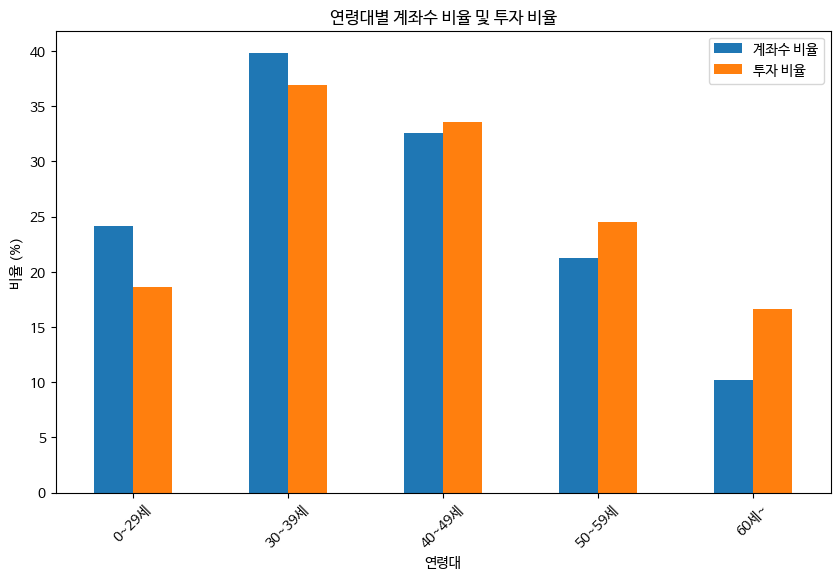

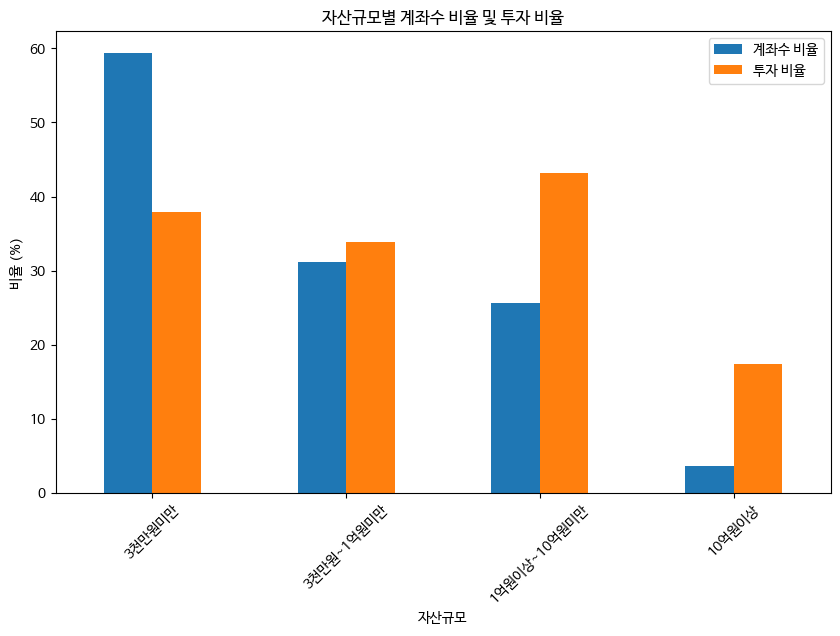

In [162]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (NanumBarunGothic 설치한 후)
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 연령대별 계좌수 비율 및 투자 비율 시각화
age_group.index = ['0~29세', '30~39세', '40~49세', '50~59세', '60세~']  # 인덱스 변경
age_group.plot(kind='bar', figsize=(10, 6))
plt.title('연령대별 계좌수 비율 및 투자 비율')
plt.xlabel('연령대')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.legend(['계좌수 비율', '투자 비율'])
plt.show()

# 자산규모별 계좌수 비율 및 투자 비율 시각화
asset_group.index = ['3천만원미만', '3천만원~1억원미만', '1억원이상~10억원미만', '10억원이상']  # 인덱스 변경
asset_group.plot(kind='bar', figsize=(10, 6))
plt.title('자산규모별 계좌수 비율 및 투자 비율')
plt.xlabel('자산규모')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.legend(['계좌수 비율', '투자 비율'])
plt.show()

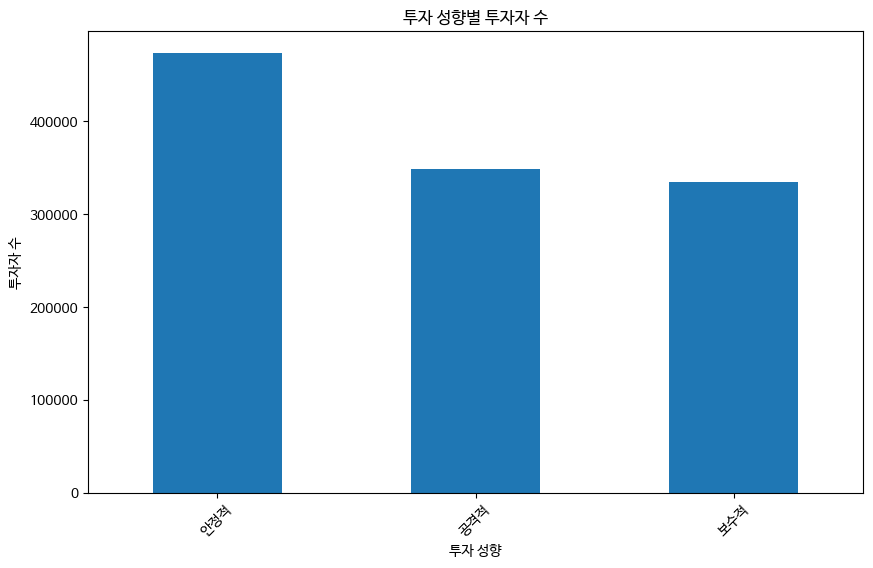

In [163]:
# 투자 성향 분류 함수 정의
def categorize_investor(전일대비증감율):
    if 전일대비증감율 < -1:  # 보수적 투자자
        return '보수적'
    elif -1 <= 전일대비증감율 <= 1:  # 안정적 투자자
        return '안정적'
    else:  # 공격적 투자자
        return '공격적'

# 투자 성향 분류
custom_df['투자 성향'] = custom_df['전일대비증감율'].apply(categorize_investor)

# 투자 성향별 투자자 수 시각화
tendency_group = custom_df['투자 성향'].value_counts()
tendency_group.plot(kind='bar', figsize=(10, 6))
plt.title('투자 성향별 투자자 수')
plt.xlabel('투자 성향')
plt.ylabel('투자자 수')
plt.xticks(rotation=45)
plt.show()

In [164]:
# 연령대별 계좌수 비율 및 투자 비율 데이터프레임 생성
age_group_df = age_group.copy()
age_group_df.index = ['0~29세', '30~39세', '40~49세', '50~59세', '60세~']  # 인덱스 변경
print("연령대별 계좌수 비율 및 투자 비율:")
print(age_group_df)

# 자산규모별 계좌수 비율 및 투자 비율 데이터프레임 생성
asset_group_df = asset_group.copy()
asset_group_df.index = ['3천만원미만', '3천만원~1억원미만', '1억원이상~10억원미만', '10억원이상']  # 인덱스 변경
print("\n자산규모별 계좌수 비율 및 투자 비율:")
print(asset_group_df)

# 투자 성향별 투자자 수 데이터프레임 생성
tendency_group_df = tendency_group.reset_index()  # 인덱스 리셋
tendency_group_df.columns = ['투자 성향', '투자자 수']  # 열 이름 변경
print("\n투자 성향별 투자자 수:")
print(tendency_group_df)

연령대별 계좌수 비율 및 투자 비율:
           계좌수 비율      투자 비율
0~29세   24.146513  18.607171
30~39세  39.850528  36.924221
40~49세  32.572950  33.567012
50~59세  21.263172  24.519586
60세~    10.169627  16.623012

자산규모별 계좌수 비율 및 투자 비율:
                 계좌수 비율      투자 비율
3천만원미만        59.350740  37.869568
3천만원~1억원미만    31.155459  33.904123
1억원이상~10억원미만  25.694802  43.207343
10억원이상         3.613757  17.394614

투자 성향별 투자자 수:
  투자 성향   투자자 수
0   안정적  473547
1   공격적  348469
2   보수적  334756


In [165]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# 1. 데이터 준비
# 연령대 및 자산 규모 데이터프레임에서 필요한 열 선택
age_group_df = age_group_df.reset_index().rename(columns={'index': '연령대'})
asset_group_df = asset_group_df.reset_index().rename(columns={'index': '자산규모'})

# 두 데이터프레임을 연결 (join)
data = age_group_df[['연령대', '투자 비율']].merge(asset_group_df[['자산규모', '투자 비율']], left_index=True, right_index=True)

# 현재 data 데이터프레임의 열 수 확인
print("현재 데이터프레임의 열:")
print(data.columns)

# 중복된 열 제거
data = data.loc[:, ~data.columns.duplicated()]

# 열 이름 변경 (현재 열 수에 맞춰 설정)
data.columns = ['연령대', '투자 비율 (연령대)', '자산규모', '투자 비율 (자산규모)']

# 2. 범주형 변수를 숫자로 변환
label_encoder = LabelEncoder()
data['연령대'] = label_encoder.fit_transform(data['연령대'])
data['자산규모'] = label_encoder.fit_transform(data['자산규모'])

# 3. 클러스터링 수행
# 필요한 열만 선택
X = data[['연령대', '자산규모', '투자 비율 (연령대)', '투자 비율 (자산규모)']]

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
data['클러스터'] = kmeans.fit_predict(X)

# 클러스터 결과 출력
print("\n클러스터링 결과:")
print(data)

# 4. 클러스터링 결과 분석 (예시)
for cluster_num in data['클러스터'].unique():
    cluster_data = data[data['클러스터'] == cluster_num]
    print(f"\n클러스터 {cluster_num} 데이터:")
    print(cluster_data)


현재 데이터프레임의 열:
Index(['연령대', '투자 비율_x', '자산규모', '투자 비율_y'], dtype='object')

클러스터링 결과:
   연령대  투자 비율 (연령대)  자산규모  투자 비율 (자산규모)  클러스터
0    0    18.607171     3     37.869568     2
1    1    36.924221     2     33.904123     0
2    2    33.567012     1     43.207343     0
3    3    24.519586     0     17.394614     1

클러스터 2 데이터:
   연령대  투자 비율 (연령대)  자산규모  투자 비율 (자산규모)  클러스터
0    0    18.607171     3     37.869568     2

클러스터 0 데이터:
   연령대  투자 비율 (연령대)  자산규모  투자 비율 (자산규모)  클러스터
1    1    36.924221     2     33.904123     0
2    2    33.567012     1     43.207343     0

클러스터 1 데이터:
   연령대  투자 비율 (연령대)  자산규모  투자 비율 (자산규모)  클러스터
3    3    24.519586     0     17.394614     1


In [166]:
# 클러스터별 통계 요약
summary = data.groupby('클러스터').agg({
    '투자 비율 (연령대)': 'mean',
    '투자 비율 (자산규모)': 'mean',
    '연령대': 'mean',
    '자산규모': 'mean'
}).reset_index()

print("\n클러스터별 통계 요약:")
print(summary)



클러스터별 통계 요약:
   클러스터  투자 비율 (연령대)  투자 비율 (자산규모)  연령대  자산규모
0     0    35.245616     38.555733  1.5   1.5
1     1    24.519586     17.394614  3.0   0.0
2     2    18.607171     37.869568  0.0   3.0


클러스터 0 통계 요약:
       투자 비율 (연령대)  투자 비율 (자산규모)       연령대      자산규모
count     2.000000      2.000000  2.000000  2.000000
mean     35.245616     38.555733  1.500000  1.500000
std       2.373905      6.578370  0.707107  0.707107
min      33.567012     33.904123  1.000000  1.000000
25%      34.406314     36.229928  1.250000  1.250000
50%      35.245616     38.555733  1.500000  1.500000
75%      36.084918     40.881538  1.750000  1.750000
max      36.924221     43.207343  2.000000  2.000000

클러스터 1 통계 요약:
       투자 비율 (연령대)  투자 비율 (자산규모)  연령대  자산규모
count     1.000000      1.000000  1.0   1.0
mean     24.519586     17.394614  3.0   0.0
std            NaN           NaN  NaN   NaN
min      24.519586     17.394614  3.0   0.0
25%      24.519586     17.394614  3.0   0.0
50%      24.519586     17.394614  3.0   0.0
75%      24.519586     17.394614  3.0   0.0
max      24.519586     17.394614  3.0   0.0

클러스터 2 통계 요약:
       투자 비율 (연령대)  투자 비율 (자산규모)  연령대  자산규모
count     1.000000      1.000000  1.0  

<Figure size 1200x600 with 0 Axes>

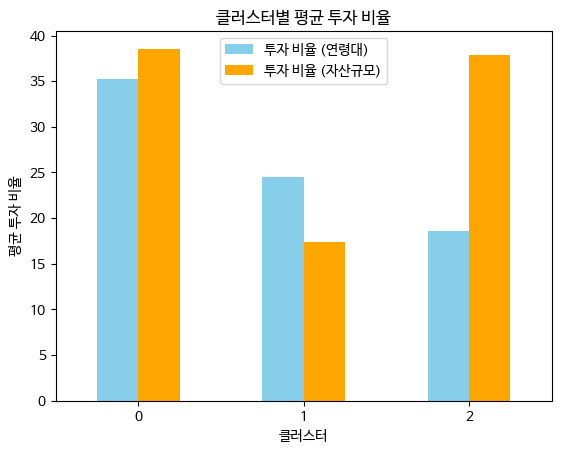

In [167]:
# 클러스터별 특정 투자 경향성 분석

# 클러스터별 데이터 필터링
cluster_0_data = data[data['클러스터'] == 0]
cluster_1_data = data[data['클러스터'] == 1]
cluster_2_data = data[data['클러스터'] == 2]

# 클러스터 0 통계 분석
cluster_0_stats = cluster_0_data[['투자 비율 (연령대)', '투자 비율 (자산규모)', '연령대', '자산규모']].describe()
print("클러스터 0 통계 요약:")
print(cluster_0_stats)

# 클러스터 1 통계 분석
cluster_1_stats = cluster_1_data[['투자 비율 (연령대)', '투자 비율 (자산규모)', '연령대', '자산규모']].describe()
print("\n클러스터 1 통계 요약:")
print(cluster_1_stats)

# 클러스터 2 통계 분석
cluster_2_stats = cluster_2_data[['투자 비율 (연령대)', '투자 비율 (자산규모)', '연령대', '자산규모']].describe()
print("\n클러스터 2 통계 요약:")
print(cluster_2_stats)

# 클러스터별 평균 투자 비율 시각화
plt.figure(figsize=(12, 6))

# 클러스터별 평균 투자 비율 계산
cluster_means = data.groupby('클러스터').mean()[['투자 비율 (연령대)', '투자 비율 (자산규모)']]

# 막대 그래프 생성
cluster_means.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('클러스터별 평균 투자 비율')
plt.xlabel('클러스터')
plt.ylabel('평균 투자 비율')
plt.xticks(rotation=0)
plt.legend(['투자 비율 (연령대)', '투자 비율 (자산규모)'])
plt.show()

### 클러스터 0 특징
투자 비율 (연령대): 평균 35.25%로, 연령대 투자 비율이 상대적으로 높음   
투자 비율 (자산규모): 평균 38.56%로, 자산 규모에 대한 투자 비율도 높음   
연령대: 평균 연령대는 1.5로, 연령대의 분포가 젊은층에 속할 가능성이 높음 (0: 낮은 연령대, 3: 높은 연령대)   
자산규모: 평균 자산 규모는 1.5로, 자산 규모가 작은 그룹에 속하는 것으로 보임.   

> 클러스터 0은 젊은 투자자들로 구성되어 있으며, 상대적으로 공격적인 투자 성향을 보이고 있음. 연령대에 비해 자산 규모가 작음에도 불구하고 높은 투자 비율을 기록하고 있어, 위험을 감수하면서 고수익을 추구하는 경향이 있음.


### 클러스터 1 특징
투자 비율 (연령대): 24.52%로 낮은 편임       
투자 비율 (자산규모): 17.39%로 매우 낮은 편임   
연령대: 3으로, 고령층에 해당         
자산규모: 3으로, 자산 규모가 큰 그룹에 속함      



> 클러스터 1은 고령의 투자자들로, 낮은 투자 비율을 보이고 있음. 이는 보수적인 투자 성향을 나타내며, 자산 규모가 크지만, 상대적으로 안전한 자산에 대한 투자 선호를 가지고 있을 가능성이 높음   


### 클러스터 2 특징
투자 비율 (연령대): 18.61%로 매우 낮음         
투자 비율 (자산규모): 37.87%로 자산 규모에 대한 투자 비율은 상대적으로 높음              
연령대: 0으로, 가장 낮은 연령대임             
자산규모: 0으로, 자산 규모가 가장 작음            



> 클러스터 2는 어린 투자자로, 매우 낮은 연령대와 낮은 자산 규모를 가지고 있음. 그러나 자산 규모에 대한 투자 비율은 높아, 자산에 대한 관심이 있지만 투자 성향은 보수적일 가능성이 있음.


## 종합 분석
<font color=blue>젊은 투자자(클러스터 0)</font> : 고위험 고수익 추구, 공격적인 투자 전략 필요.<br> <font color=blue> 중년 및 고령 투자자(클러스터 1)</font>: 안정적인 투자 성향, 배당주 및 안전한 자산 추천.<br> <font color=blue>어린 투자자(클러스터 2)</font>: 자산 규모가 작고, 자산에 대한 관심은 높지만 신중한 투자 성향을 보임.<br>


# 02. 해외 종목 정보 중 ETF 확인하기

In [168]:
STK_IEM_IFO = pd.read_csv("C:/Users/owner231128a/Downloads/open/NH_CONTEST_NW_FC_STK_IEM_IFO.csv", encoding="EUC-KR", on_bad_lines='skip')
STK_IEM_IFO.rename(columns={'bse_dt': '기준일자', 'fc_sec_krl_nm': '외화증권한글명','stk_etf_dit_cd':'주식/ETF코드'}, inplace=True)
STK_IEM_IFO

,tck_iem_cd,외화증권한글명,fc_sec_eng_nm,주식/ETF코드,ltg_tot_stk_qty,fc_mkt_dit_cd,co_adr,web_adr,btp_cfc_nm,ceo_nm,eng_utk_otl_cts,ser_cfc_nm,ids_nm,mkt_pr_tot_amt
0,AA,알코아 ...,Alcoa Corp ...,주식,258340140,NYSE,"201 Isabella Street, Suite 500 PITTSBURGH PA...",https://www.alcoa.com/global/en/home,Aluminum (NEC),William Oplinger,Alcoa Corporation is a vertically integrated a...,Basic Materials,Aluminum,8928.24
1,AAL,아메리칸 에어라인스 그룹 ...,American Airline ...,주식,656703913,NASD,1 Skyview Drive FORT WORTH TX 76155 United S...,https://americanairlines.gcs-web.com/,Regional Airlines,Robert Isom,American Airlines Group Inc. is a holding comp...,Industrials,Airlines,6711.51
2,AAN,Aaron's Company ...,Aaron's Company ...,주식,31550767,NYSE,"400 Galleria Parkway Se, Suite 300 ATLANTA G...",https://investor.aarons.com/,Consumer Leasing,Stephen Olsen,"The Aaron?? Company, Inc. is a technology-enab...",Industrials,Rental & Leasing Services,318.03
3,AAOI,어플라이드 옵토일렉트로닉스 ...,AOI ...,주식,42644441,NASD,13139 Jess Pirtle Blvd SUGAR LAND TX 77478 U...,https://ao-inc.com/,Electronic Components,Chih-Hsiang Lin,"Applied Optoelectronics, Inc. is a vertically ...",Technology,Communication Equipment,393.42
4,AAON,에이에이온 ...,AAON ...,주식,81013148,NASD,2425 South Yukon Ave. TULSA OK 74107 United ...,https://www.aaon.com/,"Heating, Ventilation & Air Conditioning",Matt Tobolski,"AAON, Inc. is a producer of heating, ventilati...",Industrials,Building Products & Equipment,7605.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,ZURA,Zura Bio ...,Zura Bio ...,주식,63207088,NASD,"4225 Executive Square, Suite - 600 SAN DIEGO...",https://zurabio.com/,Bio Therapeutic Drugs,Robert Lisicki,"Zura Bio Limited is a clinical-stage, multi-as...",Healthcare,Biotechnology,255.99
3092,ZVRA,Zevra ...,Zevra ...,주식,52617789,NASD,"1180 CELEBRATION BOULEVARD, SUITE 103 CELEBR...",https://zevra.com/,Proprietary & Advanced Pharmaceuticals,Neil Mcfarlane,"Zevra Therapeutics, Inc. is a rare disease com...",Healthcare,Biotechnology,372.01
3093,ZWS,Zurn Elkay Wtr ...,Zurn Elkay Wtr ...,주식,170928495,NYSE,511 West Freshwater Way MILWAUKEE WI 53204 U...,https://zurn-elkay.com/,Construction Supplies & Fixtures (NEC),Todd Adams,Zurn Elkay Water Solutions Corp is a pure-play...,Industrials,Pollution & Treatment Controls,5485.10
3094,ZYME,Zymeworks ...,Zymeworks ...,주식,71618027,NASD,"108 Patriot Drive, Suite A MIDDLETOWN DE 197...",https://www.zymeworks.com/,Bio Therapeutic Drugs,Kenneth Galbraith,Zymeworks Inc. is a global biotechnology compa...,Healthcare,Biotechnology,819.89


In [169]:
# '주식/ETF코드'가 ETF인 데이터만 추출
etf_data = STK_IEM_IFO[STK_IEM_IFO['주식/ETF코드'] == 'ETF']
etf_data

,tck_iem_cd,외화증권한글명,fc_sec_eng_nm,주식/ETF코드,ltg_tot_stk_qty,fc_mkt_dit_cd,co_adr,web_adr,btp_cfc_nm,ceo_nm,eng_utk_otl_cts,ser_cfc_nm,ids_nm,mkt_pr_tot_amt
6,AAPB,GraniteShares 1.75x Long AAPL Daily ETF ...,GRANITESHARES AAPL DAILY ETF ...,ETF,0,-,-,-,-,-,-,-,-,0.0
8,AAPU,Direxion Daily AAPL Bull 2X Shares ETF ...,DIREXION DAILY AAPL BULL 2X ETF ...,ETF,0,-,-,-,-,-,-,-,-,0.0
81,AGGH,Simplify Aggregate Bond Credit Hedge ETF ...,SIMPLIFY AGGREGATE BOND ETF ...,ETF,0,-,-,-,-,-,-,-,-,0.0
96,AIA,iShares Asia 50 ETF ...,ISHARES ASIA 50 ETF ...,ETF,0,-,-,-,-,-,-,-,-,0.0
101,AIQ,Global X Artificial Intellig & Tech ETF ...,GLOBAL X FUND GLB X ART INTL TGY ETF ...,ETF,0,-,-,-,-,-,-,-,-,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,XLV,SELECT SECTOR HEALTH CARE SPDR ETF ...,SELECT SECTOR HEALTH CARE SPDR ETF ...,ETF,269915324,-,-,-,-,-,-,-,-,0.0
3053,XOMO,YIELDMAX XOM OPTION INC STRG ETF ...,YIELDMAX XOM OPTION INC STRG ETF ...,ETF,0,-,-,-,-,-,-,-,-,0.0
3063,XYLD,Global X S&P 500 Covered Call ETF ...,GLOBAL X S&P 500 COVERED CALL ETF ...,ETF,68430000,-,-,-,-,-,-,-,-,0.0
3067,YINN,Direxion Daily FTSE China Bull 3x ETF ...,DIREXION DLY FTSE CHNA BUL 3X ETF ...,ETF,35692767,-,-,-,-,-,-,-,-,0.0


# 03.  ETF 거래 랭킹 <br>
ETF 거래 랭킹을 통해서 ETF 유동성을 확인할 수 있고, 시장에서의 인식을 확인해 검증된 ETF를 찾는 것에 도움을 줄 수 있다. 또한 거래 랭킹이 높은 ETF는 매수/매도 가격 차이가 좁아 거래 비용 절감 측면에서 유리하여 투자자에게 어떤 투자가 긍정적인지 보여주며 안정성을 판단할 수 있다. <br>

In [170]:
etf_tickers = etf_data['tck_iem_cd'].unique()  # 중복 제거한 티커 리스트
etf_tickers

array(['AAPB', 'AAPU', 'AGGH', 'AIA', 'AIQ', 'AIYY', 'AMDL', 'AMDY',
       'AMZU', 'AMZY', 'AOR', 'APLY', 'ARKF', 'ARKG', 'ARKK', 'ARKQ',
       'ARKW', 'ARKX', 'ARKZ', 'AWAY', 'BOTZ', 'BUCK', 'CDX', 'CIBR',
       'CLOU', 'CONL', 'CONY', 'COPX', 'CWEB', 'DFEN', 'DGRO', 'DGRW',
       'DIA', 'DISO', 'DIV', 'DIVO', 'DNL', 'DPST', 'DRIV', 'EETH', 'EWY',
       'FAS', 'FBL', 'FBY', 'FFC', 'FXI', 'GDX', 'GGLL', 'GLDM', 'GLO',
       'GOOY', 'GPIQ', 'GPIX', 'GRID', 'HDRO', 'HIGH', 'IAGG', 'IBB',
       'ICLN', 'IDEV', 'IEMG', 'IHI', 'IJH', 'IJR', 'ITA', 'IVV', 'IWM',
       'JEPI', 'JEPQ', 'JETS', 'JPMO', 'KBWY', 'KCSH', 'KLIP', 'KORU',
       'KRBN', 'KRE', 'KWEB', 'LABU', 'LIT', 'METV', 'MGK', 'MOAT',
       'MRNY', 'MSFO', 'MSFU', 'MSOS', 'MSOX', 'MTBA', 'NAIL', 'NFLY',
       'NOBL', 'NUSI', 'NVD', 'NVDL', 'NVDU', 'NVDY', 'OARK', 'PAVE',
       'PFF', 'PGX', 'PRNT', 'PYPY', 'QCLN', 'QLD', 'QQQ', 'QQQM', 'QYLD',
       'RETL', 'RPAR', 'RSSL', 'RYLD', 'SCC', 'SCHD', 'SDIV', 'SKYY',
     

In [171]:
# 종목일자별시세 데이터 불러오기
STK_DT_QUT

,bse_dt,tck_iem_cd,iem_ong_pr,iem_hi_pr,iem_low_pr,iem_end_pr,bf_dd_cmp_ind_pr,bf_dd_cmp_ind_rt,acl_trd_qty,trd_cst,sll_cns_sum_qty,byn_cns_sum_qty,sby_bse_xcg_rt
0,20240722,AAL,10.49,10.7400,10.3500,10.69,0.11,1.04,38895463.0,414252965.0,0.0,0.0,1386.6
1,20240603,AAL,11.60,11.9450,11.5000,11.53,0.03,0.26,52899042.0,609925954.0,27221369.0,25722473.0,1381.6
2,20240531,AAL,11.51,11.5700,11.2500,11.50,0.06,0.52,60868405.0,699986658.0,28279620.0,32588785.0,1376.5
3,20240625,AAL,11.18,11.3650,11.1200,11.13,-0.03,-0.27,28547274.0,317731160.0,17399022.0,11148252.0,1389.7
4,20240605,AAL,11.51,11.7650,11.4500,11.62,0.12,1.04,34340914.0,399041421.0,17637074.0,16703939.0,1373.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194826,20240702,ZS,197.60,199.3747,194.7084,196.66,-1.96,-0.99,1725207.0,339904669.0,0.0,0.0,1380.8
194827,20240807,ZS,171.14,174.7700,166.0600,166.20,0.45,0.27,1362130.0,231882881.0,879205.0,878868.0,1372.2
194828,20240617,ZS,183.00,185.5800,180.7600,184.38,0.16,0.09,1790442.0,328666782.0,720798.0,1069644.0,1377.7
194829,20240815,ZS,186.81,191.6200,184.9800,190.34,6.36,3.46,1583690.0,300663546.0,1127670.0,990550.0,1370.3


In [175]:
# STK_DT_QUT에서 해당 'tck_iem_cd'에 속하는 데이터 필터링
etf_market_data = STK_DT_QUT[STK_DT_QUT['tck_iem_cd'].isin(etf_tickers)]
etf_market_data

,bse_dt,tck_iem_cd,iem_ong_pr,iem_hi_pr,iem_low_pr,iem_end_pr,bf_dd_cmp_ind_pr,bf_dd_cmp_ind_rt,acl_trd_qty,trd_cst,sll_cns_sum_qty,byn_cns_sum_qty,sby_bse_xcg_rt


In [176]:
# 티커종목코드(tck_iem_cd)별로 누적 거래 수량(누적거래수량) 합계 계산
ticker_trade_qty = etf_market_data.groupby('티커종목코드')['누적거래수량'].sum().reset_index()

# 누적 거래 수량을 기준으로 내림차순 정렬
sorted_ticker_trade_qty = ticker_trade_qty.sort_values(by='누적거래수량', ascending=False)

# 인덱스를 재설정하여 깔끔하게 정리
sorted_ticker_trade_qty.reset_index(drop=True, inplace=True)

# 결과 출력
sorted_ticker_trade_qty


KeyError: '티커종목코드'

In [89]:
sorted_ticker_trade_qty.rename(columns={'tck_iem_cd': '티커종목코드','acl_trd_qty':'누적거래수량'}, inplace=True)
sorted_ticker_trade_qty

,티커종목코드,누적거래수량
0,SOXL,4.791392e+09
1,TQQQ,3.532010e+09
2,SPY,3.213682e+09
3,TSLL,3.014736e+09
4,XLF,2.363635e+09
...,...,...
162,AWAY,1.056584e+06
163,DISO,9.724030e+05
164,SCC,7.534610e+05
165,ARKZ,3.137580e+05


In [91]:
output_file_path = 'ETF 거래 랭킹.csv'
sorted_ticker_trade_qty.to_csv(output_file_path, index=False)

# 04. 환율 변동성 확인하기

In [177]:
STK_DT_QUT

,bse_dt,tck_iem_cd,iem_ong_pr,iem_hi_pr,iem_low_pr,iem_end_pr,bf_dd_cmp_ind_pr,bf_dd_cmp_ind_rt,acl_trd_qty,trd_cst,sll_cns_sum_qty,byn_cns_sum_qty,sby_bse_xcg_rt
0,20240722,AAL,10.49,10.7400,10.3500,10.69,0.11,1.04,38895463.0,414252965.0,0.0,0.0,1386.6
1,20240603,AAL,11.60,11.9450,11.5000,11.53,0.03,0.26,52899042.0,609925954.0,27221369.0,25722473.0,1381.6
2,20240531,AAL,11.51,11.5700,11.2500,11.50,0.06,0.52,60868405.0,699986658.0,28279620.0,32588785.0,1376.5
3,20240625,AAL,11.18,11.3650,11.1200,11.13,-0.03,-0.27,28547274.0,317731160.0,17399022.0,11148252.0,1389.7
4,20240605,AAL,11.51,11.7650,11.4500,11.62,0.12,1.04,34340914.0,399041421.0,17637074.0,16703939.0,1373.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194826,20240702,ZS,197.60,199.3747,194.7084,196.66,-1.96,-0.99,1725207.0,339904669.0,0.0,0.0,1380.8
194827,20240807,ZS,171.14,174.7700,166.0600,166.20,0.45,0.27,1362130.0,231882881.0,879205.0,878868.0,1372.2
194828,20240617,ZS,183.00,185.5800,180.7600,184.38,0.16,0.09,1790442.0,328666782.0,720798.0,1069644.0,1377.7
194829,20240815,ZS,186.81,191.6200,184.9800,190.34,6.36,3.46,1583690.0,300663546.0,1127670.0,990550.0,1370.3


In [178]:
STK_DT_QUT.rename(columns={'bse_dt': '거래일자', 'tck_iem_cd': '티커종목코드','iem_ong_pr':'종목시가','iem_hi_pr':'종목고가','iem_low_pr':'종목저가','iem_end_pr':'종목종가','bf_dd_cmp_ind_rt':'전일대비증감율','bf_dd_cmp_ind_pr':'전일대비증감가격', 'acl_trd_qty' : '누적거래수량','trd_cst': '거래대금', 'sll_cns_sum_qty' : '매도체결합계수량', 'byn_cns_sum_qty':'매수체결합계수량', 'sby_bse_xcg_rt':'환율'}, inplace=True)
STK_DT_QUT

,거래일자,티커종목코드,종목시가,종목고가,종목저가,종목종가,전일대비증감가격,전일대비증감율,누적거래수량,거래대금,매도체결합계수량,매수체결합계수량,환율
0,20240722,AAL,10.49,10.7400,10.3500,10.69,0.11,1.04,38895463.0,414252965.0,0.0,0.0,1386.6
1,20240603,AAL,11.60,11.9450,11.5000,11.53,0.03,0.26,52899042.0,609925954.0,27221369.0,25722473.0,1381.6
2,20240531,AAL,11.51,11.5700,11.2500,11.50,0.06,0.52,60868405.0,699986658.0,28279620.0,32588785.0,1376.5
3,20240625,AAL,11.18,11.3650,11.1200,11.13,-0.03,-0.27,28547274.0,317731160.0,17399022.0,11148252.0,1389.7
4,20240605,AAL,11.51,11.7650,11.4500,11.62,0.12,1.04,34340914.0,399041421.0,17637074.0,16703939.0,1373.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194826,20240702,ZS,197.60,199.3747,194.7084,196.66,-1.96,-0.99,1725207.0,339904669.0,0.0,0.0,1380.8
194827,20240807,ZS,171.14,174.7700,166.0600,166.20,0.45,0.27,1362130.0,231882881.0,879205.0,878868.0,1372.2
194828,20240617,ZS,183.00,185.5800,180.7600,184.38,0.16,0.09,1790442.0,328666782.0,720798.0,1069644.0,1377.7
194829,20240815,ZS,186.81,191.6200,184.9800,190.34,6.36,3.46,1583690.0,300663546.0,1127670.0,990550.0,1370.3


In [179]:
# ETF 종목 코드 목록 가져오기
etf_codes = etf_data['tck_iem_cd']
etf_codes

6       AAPB
8       AAPU
81      AGGH
96       AIA
101      AIQ
        ... 
3048     XLV
3053    XOMO
3063    XYLD
3067    YINN
3069    YMAX
Name: tck_iem_cd, Length: 167, dtype: object

In [180]:
# STK_DT_QUT의 열 이름 확인
# print(STK_DT_QUT.columns)
STK_DT_QUT['티커종목코드'] = STK_DT_QUT['티커종목코드'].str.strip()  # 공백 제거
etf_codes = etf_data['tck_iem_cd'].str.strip().unique()  # 중복 제거 및 공백 제거
etf_stk_data = STK_DT_QUT[STK_DT_QUT['티커종목코드'].isin(etf_codes)]
etf_stk_data

,거래일자,티커종목코드,종목시가,종목고가,종목저가,종목종가,전일대비증감가격,전일대비증감율,누적거래수량,거래대금,매도체결합계수량,매수체결합계수량,환율
252,20240627,AAPB,26.36,26.5600,25.7900,26.20,0.21,0.81,227236.0,5953583.0,137347.0,89889.0,1390.1
253,20240625,AAPB,25.05,25.5800,24.9300,25.03,0.21,0.85,155926.0,3902828.0,91537.0,64389.0,1389.7
254,20240718,AAPB,30.10,30.1000,28.0400,28.45,-1.27,-4.27,284823.0,8171305.0,0.0,0.0,1381.5
255,20240528,AAPB,21.36,21.6492,20.8200,21.03,0.04,0.19,119462.0,2512286.0,30618.0,88844.0,1365.4
256,20240719,AAPB,28.64,29.1174,28.2400,28.51,0.06,0.21,128792.0,3665536.0,967606.0,1047838.0,1379.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193881,20240812,YMAX,17.94,17.9400,17.7000,17.84,-0.02,-0.11,335328.0,5982251.0,373276.0,370157.0,1369.4
193882,20240702,YMAX,19.60,19.6800,19.5600,19.68,0.10,0.51,489837.0,9639966.0,0.0,0.0,1380.8
193883,20240815,YMAX,17.62,17.7580,17.6100,17.65,-0.48,-2.65,410468.0,7244760.0,393831.0,308905.0,1370.3
193884,20240813,YMAX,17.95,18.1500,17.9000,18.14,0.30,1.68,323170.0,5862303.0,311054.0,401700.0,1367.7


In [181]:
# 거래일자별로 정렬
etf_stk_data_sorted = etf_stk_data.sort_values(by='거래일자')  # '기준일자'로 정렬

# tck_iem_cd 열 삭제
etf_stk_data_sorted = etf_stk_data_sorted.drop(columns=['tck_iem_cd'], errors='ignore')  # 열 삭제

# 결과 확인
etf_stk_data_sorted

,거래일자,티커종목코드,종목시가,종목고가,종목저가,종목종가,전일대비증감가격,전일대비증감율,누적거래수량,거래대금,매도체결합계수량,매수체결합계수량,환율
143526,20240528,IAGG,49.72,49.7400,49.5400,49.5800,-0.0800,-0.16,292752.0,14514644.0,149839.0,142913.0,1365.4
105430,20240528,AMDL,18.27,19.3800,17.3600,18.7300,1.0700,6.06,1404908.0,26313927.0,635829.0,769079.0,1365.4
193852,20240528,YMAX,20.35,20.3600,20.1036,20.3000,0.0400,0.20,386633.0,7848649.0,200891.0,185742.0,1365.4
255,20240528,AAPB,21.36,21.6492,20.8200,21.0300,0.0400,0.19,119462.0,2512286.0,30618.0,88844.0,1365.4
11334,20240528,AWAY,19.91,19.9900,19.7200,19.8098,-0.0902,-0.45,18776.0,371953.0,7086.0,11690.0,1365.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162209,20240826,OARK,10.46,10.5200,10.4000,10.4800,-0.0400,-0.38,57824.0,605995.0,436343.0,379712.0,1340.1
81937,20240826,SOF,100.60,100.6299,100.6000,100.6200,0.0172,0.02,2749.0,276604.0,83650.0,17560.0,1340.1
34642,20240826,FFC,15.46,15.6300,15.4600,15.6000,0.1300,0.84,117024.0,1825574.0,208546.0,209835.0,1340.1
37897,20240826,GDX,39.58,39.6700,39.0650,39.2300,-0.1100,-0.28,9216574.0,361474032.0,7671711.0,8535062.0,1340.1


In [182]:
# 환율의 일일 수익률 계산
etf_stk_data_sorted['환율_수익률'] = etf_stk_data_sorted['환율'].pct_change()  # 일일 수익률 계산

# 환율 변동성 (표준편차) 계산
환율_변동성 = etf_stk_data_sorted['환율_수익률'].std()  # 수익률의 표준편차

# 결과 출력
print(f"환율의 변동성: {환율_변동성}")

환율의 변동성: 0.00033547969718831686


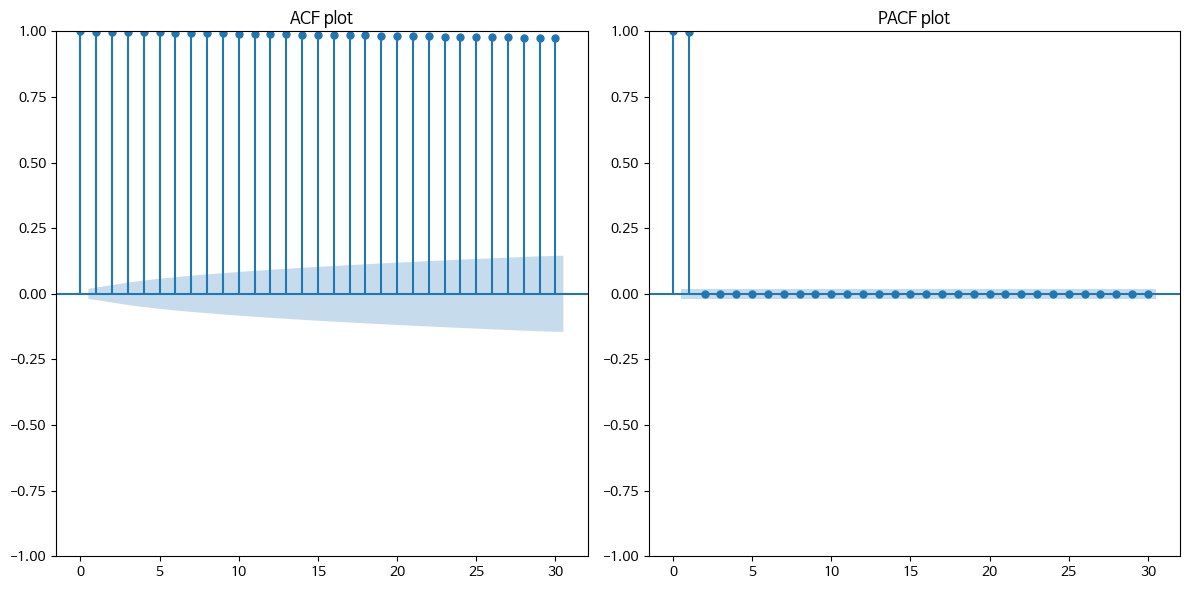

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 데이터프레임에서 환율 데이터 추출
환율_데이터 = etf_stk_data_sorted['환율']

# ACF와 PACF 플롯 생성
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(환율_데이터, lags=30, ax=plt.gca())
plt.title('ACF plot')

plt.subplot(1, 2, 2)
plot_pacf(환율_데이터, lags=30, ax=plt.gca())
plt.title('PACF plot')

plt.tight_layout()
plt.show()

환율 변동성에서 환율의 일일 수익률의 변동이 매우 작기 때문에 환율은 상대적으로 안정적인 상황으로 판단된다. 또한 ARIMA 모델을 활용하여 환율의 변동성을 확인했을 때 그래프 상의 변동성이 크지 않기 때문에 앞으로의 환율 변동성 또한 미미할 것으로 예측된다. <br>
ETF 투자에서 환율 변동성이 안정적이면, 해외 ETF에 투자할 때 환 리스크가 줄어들고, 수익률 예측이 용이해진다. 또한 헤지 비용이 필요 없거나 줄어들어 더 효율적인 투자 전략을 세울 수 있으며, 다양한 해외 자산에 안정적으로 분산 투자할 수 있다. 따라서 현재 상황은 투자자에게 긍정적인 표시이며 해당 내용을 포트폴리오에 추가 할 예정이다

# 05. 종목별 리스크 정도 파악하기

In [184]:
STK_DD_IFO = pd.read_csv("C:/Users/owner231128a/Downloads/open/NH_CONTEST_NHDATA_STK_DD_IFO.csv", encoding="EUC-KR", on_bad_lines='skip')
STK_DD_IFO

,bse_dt,tck_iem_cd,tot_hld_act_cnt,tot_hld_qty,tco_avg_hld_qty,tco_avg_hld_wht_rt,tco_avg_eal_pls,tco_avg_phs_uit_pr,tco_avg_pft_rt,tco_avg_hld_te_dd_cnt,...,dist_hnk_pct50_nmv,dist_hnk_pct70_nmv,dist_hnk_pct90_nmv,bse_end_pr,lss_ivo_rt,pft_ivo_rt,ifw_act_cnt,ofw_act_cnt,vw_tgt_cnt,rgs_tgt_cnt
0,20240730,AAL,2705,313122,115.76,14.86,-491381.62,20809.67,-22.75,1.0,...,20812.000,23336.400,25598.071,14414.531,0.9811,0.0189,5,4,655,6
1,20240711,AAL,2717,304962,112.24,14.38,-389528.74,20895.44,-18.34,1.0,...,20853.000,23338.000,25598.533,15449.399,0.9382,0.0611,5,11,1353,12
2,20240710,AAL,2721,303099,111.39,14.53,-421285.00,20907.40,-19.93,1.0,...,20873.000,23336.400,25598.533,15189.803,0.9662,0.0338,6,12,619,14
3,20240610,AAL,2761,277875,100.64,14.72,-377206.65,21030.96,-19.25,3.0,...,20978.000,23349.318,25608.000,15719.313,0.9377,0.0623,27,6,406,0
4,20240529,AAL,2615,227029,86.82,15.32,-182141.06,21412.94,-10.30,1.0,...,21418.000,23506.000,25680.509,18271.678,0.8172,0.1816,6,21,2100,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81633,20240613,ZS,176,2123,12.06,5.53,63116.45,264799.14,2.05,1.0,...,262808.000,296430.333,350410.333,260169.974,0.5455,0.4545,19,1,185,8
81634,20240823,ZS,168,1926,11.46,5.82,66275.68,266174.23,2.24,1.0,...,269766.889,294261.000,350410.333,264214.302,0.5714,0.4286,0,2,53,0
81635,20240805,ZS,174,1985,11.41,5.28,-302673.13,266417.38,-10.23,3.0,...,269822.250,292272.500,350410.333,232717.056,0.7701,0.2299,1,6,108,1
81636,20240712,ZS,186,2101,11.30,5.64,147470.45,266621.34,5.07,1.0,...,269822.250,292031.000,350052.250,270389.192,0.4946,0.5054,0,4,156,8


In [185]:
STK_DD_IFO.rename(columns={'bse_dt': '기준일자', 'tck_iem_cd': '티커종목코드','dist_hnk_pct10_nmv':'상위10%','dist_hnk_pct30_nmv':'상위30%','dist_hnk_pct50_nmv':'상위50%','dist_hnk_pct70_nmv':'상위70%','dist_hnk_pct90_nmv':'상위90%'}, inplace=True)
STK_DD_IFO

,기준일자,티커종목코드,tot_hld_act_cnt,tot_hld_qty,tco_avg_hld_qty,tco_avg_hld_wht_rt,tco_avg_eal_pls,tco_avg_phs_uit_pr,tco_avg_pft_rt,tco_avg_hld_te_dd_cnt,...,상위50%,상위70%,상위90%,bse_end_pr,lss_ivo_rt,pft_ivo_rt,ifw_act_cnt,ofw_act_cnt,vw_tgt_cnt,rgs_tgt_cnt
0,20240730,AAL,2705,313122,115.76,14.86,-491381.62,20809.67,-22.75,1.0,...,20812.000,23336.400,25598.071,14414.531,0.9811,0.0189,5,4,655,6
1,20240711,AAL,2717,304962,112.24,14.38,-389528.74,20895.44,-18.34,1.0,...,20853.000,23338.000,25598.533,15449.399,0.9382,0.0611,5,11,1353,12
2,20240710,AAL,2721,303099,111.39,14.53,-421285.00,20907.40,-19.93,1.0,...,20873.000,23336.400,25598.533,15189.803,0.9662,0.0338,6,12,619,14
3,20240610,AAL,2761,277875,100.64,14.72,-377206.65,21030.96,-19.25,3.0,...,20978.000,23349.318,25608.000,15719.313,0.9377,0.0623,27,6,406,0
4,20240529,AAL,2615,227029,86.82,15.32,-182141.06,21412.94,-10.30,1.0,...,21418.000,23506.000,25680.509,18271.678,0.8172,0.1816,6,21,2100,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81633,20240613,ZS,176,2123,12.06,5.53,63116.45,264799.14,2.05,1.0,...,262808.000,296430.333,350410.333,260169.974,0.5455,0.4545,19,1,185,8
81634,20240823,ZS,168,1926,11.46,5.82,66275.68,266174.23,2.24,1.0,...,269766.889,294261.000,350410.333,264214.302,0.5714,0.4286,0,2,53,0
81635,20240805,ZS,174,1985,11.41,5.28,-302673.13,266417.38,-10.23,3.0,...,269822.250,292272.500,350410.333,232717.056,0.7701,0.2299,1,6,108,1
81636,20240712,ZS,186,2101,11.30,5.64,147470.45,266621.34,5.07,1.0,...,269822.250,292031.000,350052.250,270389.192,0.4946,0.5054,0,4,156,8


In [186]:
#필요한 데이터 열만 뽑아내기
STK_DD_IFO_dist_hnk = STK_DD_IFO[['기준일자', '티커종목코드','상위10%','상위30%','상위50%','상위70%','상위90%']]
STK_DD_IFO_dist_hnk

,기준일자,티커종목코드,상위10%,상위30%,상위50%,상위70%,상위90%
0,20240730,AAL,15594.42000,18497.000,20812.000,23336.400,25598.071
1,20240711,AAL,15746.15385,18673.250,20853.000,23338.000,25598.533
2,20240710,AAL,15758.86806,18687.500,20873.000,23336.400,25598.533
3,20240610,AAL,15982.88000,18909.000,20978.000,23349.318,25608.000
4,20240529,AAL,17097.00000,19434.500,21418.000,23506.000,25680.509
...,...,...,...,...,...,...,...
81633,20240613,ZS,155670.00000,243115.667,262808.000,296430.333,350410.333
81634,20240823,ZS,155670.00000,249586.333,269766.889,294261.000,350410.333
81635,20240805,ZS,156919.00000,252115.000,269822.250,292272.500,350410.333
81636,20240712,ZS,157358.31250,252867.571,269822.250,292031.000,350052.250


C:\Users\owner231128a\AppData\Local\Temp\ipykernel_22736\1304618547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STK_DD_IFO_dist_hnk['변동성_10_90'] = STK_DD_IFO_dist_hnk['상위90%'] - STK_DD_IFO_dist_hnk['상위10%']
C:\Users\owner231128a\AppData\Local\Temp\ipykernel_22736\1304618547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STK_DD_IFO_dist_hnk['변동성_50_90'] = STK_DD_IFO_dist_hnk['상위90%'] - STK_DD_IFO_dist_hnk['상위50%']


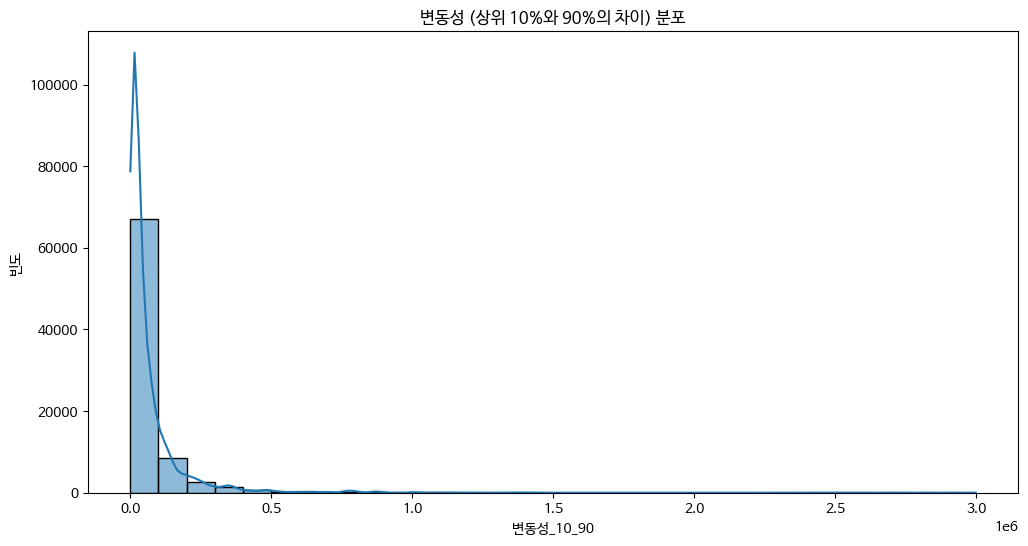

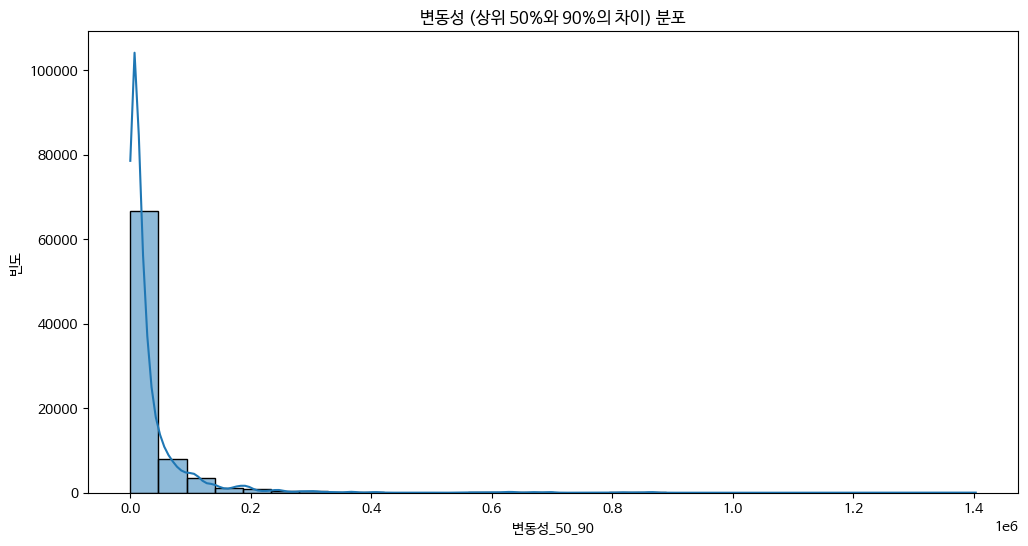

In [187]:
import seaborn as sns

STK_DD_IFO_dist_hnk['변동성_10_90'] = STK_DD_IFO_dist_hnk['상위90%'] - STK_DD_IFO_dist_hnk['상위10%']
STK_DD_IFO_dist_hnk['변동성_50_90'] = STK_DD_IFO_dist_hnk['상위90%'] - STK_DD_IFO_dist_hnk['상위50%']

# 변동성_10_90 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(STK_DD_IFO_dist_hnk['변동성_10_90'], bins=30, kde=True)
plt.title('변동성 (상위 10%와 90%의 차이) 분포')
plt.xlabel('변동성_10_90')
plt.ylabel('빈도')
plt.show()

# 변동성_50_90 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(STK_DD_IFO_dist_hnk['변동성_50_90'], bins=30, kde=True)
plt.title('변동성 (상위 50%와 90%의 차이) 분포')
plt.xlabel('변동성_50_90')
plt.ylabel('빈도')
plt.show()

In [180]:
print(STK_DD_IFO_dist_hnk.columns)

Index(['기준일자', '티커종목코드', '상위10%', '상위30%', '상위50%', '상위70%', '상위90%',
       '변동성_10_90', '변동성_50_90'],
      dtype='object')


In [188]:
# 가격 변동성 계산
STK_DD_IFO_dist_hnk['가격_변동성'] = STK_DD_IFO_dist_hnk['변동성_10_90'] / STK_DD_IFO_dist_hnk['상위10%']

# 결과 확인
STK_DD_IFO_dist_hnk[['티커종목코드', '변동성_10_90', '가격_변동성']]

C:\Users\owner231128a\AppData\Local\Temp\ipykernel_22736\1399578960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STK_DD_IFO_dist_hnk['가격_변동성'] = STK_DD_IFO_dist_hnk['변동성_10_90'] / STK_DD_IFO_dist_hnk['상위10%']


,티커종목코드,변동성_10_90,가격_변동성
0,AAL,10003.65100,0.641489
1,AAL,9852.37915,0.625701
2,AAL,9839.66494,0.624389
3,AAL,9625.12000,0.602214
4,AAL,8583.50900,0.502048
...,...,...,...
81633,ZS,194740.33300,1.250982
81634,ZS,194740.33300,1.250982
81635,ZS,193491.33300,1.233065
81636,ZS,192693.93750,1.224555


In [189]:
from scipy.stats import shapiro

stat, p = shapiro(STK_DD_IFO_dist_hnk['변동성_10_90'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# p-value 해석
alpha = 0.05
if p > alpha:
    print('데이터는 정규 분포를 따릅니다 (귀무가설 채택)')
else:
    print('데이터는 정규 분포를 따르지 않습니다 (귀무가설 기각)')


Statistics=0.397, p=0.000
데이터는 정규 분포를 따르지 않습니다 (귀무가설 기각)


c:\Users\owner231128a\Desktop\DACON\[DACON]\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 81638.
  res = hypotest_fun_out(*samples, **kwds)


In [190]:
# 가격 변동성 계산
STK_DD_IFO_dist_hnk['변동성_10_90'] = STK_DD_IFO_dist_hnk['상위90%'] - STK_DD_IFO_dist_hnk['상위10%']

# 티커 종목별 평균 변동성 계산
grouped_volatility = STK_DD_IFO_dist_hnk.groupby('티커종목코드').agg(
    평균_변동성_10_90=('변동성_10_90', 'mean')
).reset_index()

# 중앙값 및 IQR 계산
median_price_volatility = grouped_volatility['평균_변동성_10_90'].median()
Q1 = grouped_volatility['평균_변동성_10_90'].quantile(0.25)  # 1사분위수
Q3 = grouped_volatility['평균_변동성_10_90'].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1

# 가격 변동성 평가 함수 정의
def evaluate_volatility(row):
    if row['평균_변동성_10_90'] > (Q3 + 1.5 * IQR):
        return "High Volatility"
    elif row['평균_변동성_10_90'] < (Q1 - 1.5 * IQR):
        return "Low Volatility"
    else:
        return "Moderate Volatility"

# 가격 변동성 평가 적용
grouped_volatility['가격_변동성_평가'] = grouped_volatility.apply(evaluate_volatility, axis=1)

# 결과 출력
grouped_volatility[['티커종목코드', '평균_변동성_10_90', '가격_변동성_평가']]


C:\Users\owner231128a\AppData\Local\Temp\ipykernel_22736\3169965596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STK_DD_IFO_dist_hnk['변동성_10_90'] = STK_DD_IFO_dist_hnk['상위90%'] - STK_DD_IFO_dist_hnk['상위10%']


,티커종목코드,평균_변동성_10_90,가격_변동성_평가
0,AA,36531.571178,Moderate Volatility
1,AAL,9826.658184,Moderate Volatility
2,AAN,23129.196094,Moderate Volatility
3,AAOI,12932.812347,Moderate Volatility
4,AAPB,14674.339660,Moderate Volatility
...,...,...,...
1272,ZTS,68120.669274,Moderate Volatility
1273,ZUO,7108.256312,Moderate Volatility
1274,ZURA,30331.534315,Moderate Volatility
1275,ZVRA,14115.918571,Moderate Volatility


In [184]:
grouped_volatility.to_csv('종목별 리스크.csv', index=False)

# High와 Moderate 개수 계산
risk_count = grouped_volatility['가격_변동성_평가'].value_counts()

# 결과 출력
high_count = risk_count.get("High Volatility", 0)
moderate_count = risk_count.get("Moderate Volatility", 0)

print(f"High Volatility 개수: {high_count}")
print(f"Moderate Volatility 개수: {moderate_count}")


High Volatility 개수: 122
Moderate Volatility 개수: 1155


현재 ETF 종목에는 Moderate Volatility가 1155개로 가장 많고 low Volatility는 존재하지 않음을 확인할 수 있다. 따라서 우리는 High Volatility로 분류된 ETF 종목들은 고위험군으로 둘 것이다.

# 06 딥러닝을 통한 주가 예측
 시계열 기반 딥러닝 모델인 LSTM을 이용해 과거 데이터를 바탕으로 미래의 주가를 예측할 것이다.

이거 뭔가 안된다,.,,, 으악,,,


In [191]:
SOR_IFO = pd.read_csv("C:/Users/owner231128a/Downloads/open/NH_CONTEST_ETF_SOR_IFO.csv", encoding="EUC-KR", on_bad_lines='skip')
SOR_IFO

,bse_dt,etf_iem_cd,mm1_tot_pft_rt,mm3_tot_pft_rt,yr1_tot_pft_rt,etf_sor,etf_z_sor,z_sor_rnk,acl_pft_rt_z_sor,ifo_rt_z_sor,shpr_z_sor,crr_z_sor,trk_err_z_sor,mxdd_z_sor,vty_z_sor
0,20240613,AIYY,14.5337,-4.8952,0.0000,13.676285,0.000000,1110,0.180343,0.721371,0.090171,5.139766,98.827773,0.450857,1.172227
1,20240717,AIYY,2.3820,19.5972,0.0000,13.893617,0.000000,1129,0.088652,1.861702,0.177305,5.762411,98.670213,0.354610,1.329787
2,20240528,AIYY,-2.2155,-18.1966,0.0000,20.203420,3.150315,1077,0.090009,0.090009,0.000000,71.557156,98.649865,0.450045,1.350135
3,20240618,AIYY,4.5304,-6.3123,0.0000,13.652291,0.000000,1114,0.089847,0.718778,0.089847,5.031447,98.831986,0.449236,1.168014
4,20240712,AIYY,-5.8029,5.7098,0.0000,13.651556,0.000000,1126,0.088889,1.422222,0.177778,4.000000,98.844444,0.266667,1.155556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,20240807,VYM,-0.5651,1.5242,12.1163,42.481970,48.021108,592,41.248901,36.499560,47.757256,86.543536,21.284081,59.014952,77.396658
3402,20240722,VYM,3.0667,6.5070,16.7037,39.911348,40.691489,670,32.978723,32.358156,44.769504,85.992908,20.744681,54.521277,77.127660
3403,20240716,VYM,3.4150,5.5350,17.1181,44.027507,52.440106,537,46.583851,43.389530,51.375333,81.898846,21.472937,55.545697,76.663709
3404,20240819,VYM,-0.1050,2.9582,19.5345,43.321960,51.356080,557,40.419948,35.345582,51.793526,90.376203,20.909886,63.167104,77.165354


In [186]:
SOR_IFO.rename(columns={'bse_dt': '거래일자','etf_iem_cd':'티커종목코드','mm1_tot_pft_rt':'1개월총수익률','mm3_tot_pft_rt':'3개월총수익률','yr1_tot_pft_rt':'1년총수익률','etf_sor':'ETF점수','etf_z_sor':'ETF_Z점수','z_sor_rnk':'Z점수순위','acl_pft_rt_z_sor':'누적수익률_Z점수','ifo_rt_z_sor':'정보비율_Z점수','shpr_z_sor':'샤프지수_Z점수','crr_z_sor':'상관관계_Z점수','trk_err_z_sor':'트래킹에러_Z점수','mxdd_z_sor':'최대낙폭Z점수','vty_z_sor':'변동성Z점수' }, inplace=True)
SOR_IFO

,거래일자,티커종목코드,1개월총수익률,3개월총수익률,1년총수익률,ETF점수,ETF_Z점수,Z점수순위,누적수익률_Z점수,정보비율_Z점수,샤프지수_Z점수,상관관계_Z점수,트래킹에러_Z점수,최대낙폭Z점수,변동성Z점수
0,20240613,AIYY,14.5337,-4.8952,0.0000,13.676285,0.000000,1110,0.180343,0.721371,0.090171,5.139766,98.827773,0.450857,1.172227
1,20240717,AIYY,2.3820,19.5972,0.0000,13.893617,0.000000,1129,0.088652,1.861702,0.177305,5.762411,98.670213,0.354610,1.329787
2,20240528,AIYY,-2.2155,-18.1966,0.0000,20.203420,3.150315,1077,0.090009,0.090009,0.000000,71.557156,98.649865,0.450045,1.350135
3,20240618,AIYY,4.5304,-6.3123,0.0000,13.652291,0.000000,1114,0.089847,0.718778,0.089847,5.031447,98.831986,0.449236,1.168014
4,20240712,AIYY,-5.8029,5.7098,0.0000,13.651556,0.000000,1126,0.088889,1.422222,0.177778,4.000000,98.844444,0.266667,1.155556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,20240807,VYM,-0.5651,1.5242,12.1163,42.481970,48.021108,592,41.248901,36.499560,47.757256,86.543536,21.284081,59.014952,77.396658
3402,20240722,VYM,3.0667,6.5070,16.7037,39.911348,40.691489,670,32.978723,32.358156,44.769504,85.992908,20.744681,54.521277,77.127660
3403,20240716,VYM,3.4150,5.5350,17.1181,44.027507,52.440106,537,46.583851,43.389530,51.375333,81.898846,21.472937,55.545697,76.663709
3404,20240819,VYM,-0.1050,2.9582,19.5345,43.321960,51.356080,557,40.419948,35.345582,51.793526,90.376203,20.909886,63.167104,77.165354


In [187]:
STK_DT_QUT

,기준일자,티커종목코드,종목시가,종목고가,종목저가,종목종가,전일대비증감가격,전일대비증감율,누적거래수량,거래대금,매도체결합계수량,매수체결합계수량,환율
0,20240722,AAL,10.49,10.7400,10.3500,10.69,0.11,1.04,38895463.0,414252965.0,0.0,0.0,1386.6
1,20240603,AAL,11.60,11.9450,11.5000,11.53,0.03,0.26,52899042.0,609925954.0,27221369.0,25722473.0,1381.6
2,20240531,AAL,11.51,11.5700,11.2500,11.50,0.06,0.52,60868405.0,699986658.0,28279620.0,32588785.0,1376.5
3,20240625,AAL,11.18,11.3650,11.1200,11.13,-0.03,-0.27,28547274.0,317731160.0,17399022.0,11148252.0,1389.7
4,20240605,AAL,11.51,11.7650,11.4500,11.62,0.12,1.04,34340914.0,399041421.0,17637074.0,16703939.0,1373.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194826,20240702,ZS,197.60,199.3747,194.7084,196.66,-1.96,-0.99,1725207.0,339904669.0,0.0,0.0,1380.8
194827,20240807,ZS,171.14,174.7700,166.0600,166.20,0.45,0.27,1362130.0,231882881.0,879205.0,878868.0,1372.2
194828,20240617,ZS,183.00,185.5800,180.7600,184.38,0.16,0.09,1790442.0,328666782.0,720798.0,1069644.0,1377.7
194829,20240815,ZS,186.81,191.6200,184.9800,190.34,6.36,3.46,1583690.0,300663546.0,1127670.0,990550.0,1370.3


In [188]:
STK_DT_QUT_cols = ['종목시가', '종목고가', '종목저가', '종목종가', '누적거래수량', '거래대금', '거래일자']

In [189]:
from sklearn.preprocessing import MinMaxScaler


# 기준일자를 datetime 형식으로 변환하고 정렬
STK_DT_QUT['기준일자'] = pd.to_datetime(STK_DT_QUT['기준일자'])
STK_DT_QUT = STK_DT_QUT.sort_values('기준일자')

# 시가 종가 사용
prices = STK_DT_QUT[['종목시가', '종목종가']]

# 데이터를 MinMaxScaler로 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)

In [190]:
# LSTM 모델에 사용할 데이터를 훈련셋과 데이터셋으로 나눔

# 훈련용 데이터와 테스트용 데이터 분리 (80% 훈련, 20% 테스트)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# LSTM에 맞게 데이터 셋 만들기 (lookback을 60)
def create_dataset(data, lookback=60):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback, 0])  # 종목시가 사용 
        y.append(data[i + lookback, 1])  # 종목종가 예측
    return np.array(X), np.array(y)

lookback = 60
X_train, y_train = create_dataset(train_data, lookback)
X_test, y_test = create_dataset(test_data, lookback)

# LSTM 입력 형태 맞추기 (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [191]:
import torch
import torch.nn as nn

# LSTM 모델 클래스 정의
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 종가 예측

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # 마지막 LSTM의 출력
        return out
    

ModuleNotFoundError: No module named 'torch'

# 07. 리스크 관리
최대 낙폭 Z점수 및 변동성Z점수 회귀분석을 통하여 투자자들이 리스크 관리 도구로 사용하도록 함. 

In [149]:
SOR_IFO 

NameError: name 'SOR_IFO' is not defined

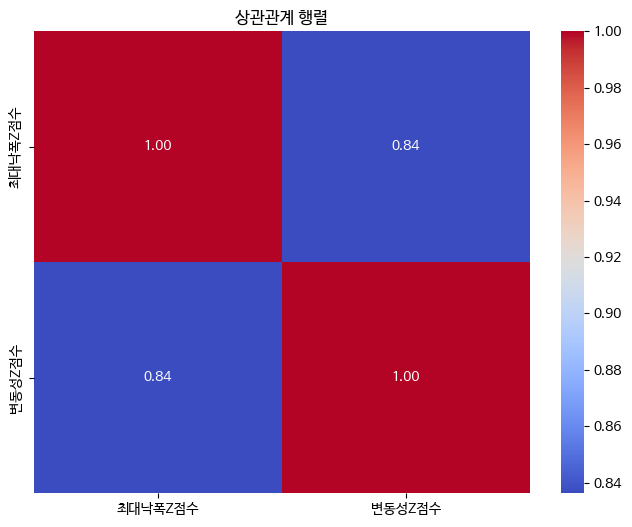

In [113]:
# 상관관계 분석

#상관관계 행렬
corr_matrix = SOR_IFO[['최대낙폭Z점수', '변동성Z점수']].corr()

# 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계 행렬')
plt.show()

그래프 해석
- 헹렬구성 <br>
왼쪽 상단과 오른쪽 하단은 각 변수의 상관계수를 나타낸다. 해당 그래프의 경우 최대낙폭Z점수와 변동성Z점수의 상관계수는 각각 1.00이다. 이는 같은 변수 간의 상관계수가 항상 1임을 의미한다.
- 상관계수<br>
최대 낙폭 Z점수와 변동성 Z점수 간의 상관계수는 0.84로, 이는 두 변수 간에 강한 양의 상관관계가 있음을 나타낸다. 즉, 하나의 Z점수가 증가할 때 다른 Z점수도 함께 증가하는 경향이 있다.
- 색상 표현 <br>
색상은 상관계수의 강도를 나타냅니다. 1에 가까울수록 붉은 색조가 강해지고, -1에 가까울수록 푸른 색조가 강해진다. 해당 그래프에서는 강한 양의 상관관계이므로 대부분 붉은 색으로 표시되어있다. <br><br>

결론적으로 이 상관행렬은 최대 낙폭 Z점수와 변동성 Z점수 간의 관계가 매우 강하다는 것을 시각적으로 강조한다. 우리는 이 정보를 바탕으로 두 지표가 서로 관련있음을 이해하고 고객 특성에 맞게 리스크 관리 전략을 세우고자 한다.


In [114]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = SOR_IFO[['변동성Z점수']]  # 예: 변동성 Z점수를 독립 변수로 사용
y = SOR_IFO['최대낙폭Z점수']  # 최대 낙폭 Z점수를 종속 변수로 사용

# 상수 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                최대낙폭Z점수   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     7915.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:42:45   Log-Likelihood:                -13763.
No. Observations:                3406   AIC:                         2.753e+04
Df Residuals:                    3404   BIC:                         2.754e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5018      0.380     17.126      0.0

우리는 선형 회귀 분석을 통해 독립 변수인 변동성 Z점수가 종속 변수인 최대 낙폭 Z점수에 미치는 영향을 평가하였다. <br>
회귀 분석 결과 변동성 Z점수가 최대 낙폭 Z점수에 강한 영향을 미친다는 것을 확인하였다. R-squared 값이 0.699로 상당히 높은 수준이며, 변동성 Z점수의 회귀 계수가 통계적으로 유의미한 것으로 나타났다. 이를 통해 우리는 변동성 Z점수를 활용하여 최대 낙폭 Z점수를 예측하고 리스크 관리를 위한 전략을 세울 수 있다.

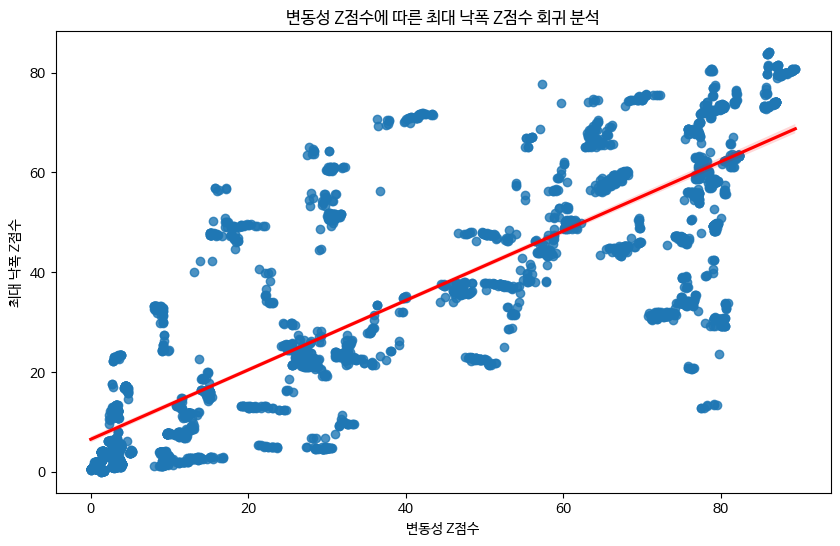

In [115]:
# 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.regplot(x='변동성Z점수', y='최대낙폭Z점수', data=SOR_IFO, line_kws={'color': 'red'})
plt.title('변동성 Z점수에 따른 최대 낙폭 Z점수 회귀 분석')
plt.xlabel('변동성 Z점수')
plt.ylabel('최대 낙폭 Z점수')
plt.show()


해당 회귀 분석 결과를 시각화하여 나타냈다. <br>
x축은 변동성 Z점수로 투자 자산의 변동성을 측정하는 지표이다. 값이 클수록 자산의 가격 변동이 크다는 것을 의미한다.
y축은 최대 낙폭 Z점수로 최대 낙폭 Z점수를 나타낸다. 최대 낙폭은 자산의 가격이 얼마나 많이 하락했는지를 측정하는 지표로, 값이 높을수록 자산의 가격이 크게 하락한 경험이 있다는 것을 나타낸다.<br>
선의 기울기가 양수인 것을 보아, 변동성이 클수록 최대 낙폭도 클 가능성이 높다는 것을 보여준다. 즉, 높은 변동성을 가진 자산은 더 큰 낙폭을 경험할 가능성이 크다는 의미이다. <br>
결론적으로 변동성이 큰 자산이 일반적으로 더 큰 낙폭을 경험한다는 것을 나타내며 투자자의 리스크 관리를 도와줄 수 있다.

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 종목별로 그룹화
grouped = SOR_IFO.groupby('etf_iem_cd')

# 종목별 회귀 분석 결과 저장할 리스트
results = []

# 종목별로 회귀 분석 수행
for ticker, group in grouped:
    X = group[['vty_z_sor']]
    y = group['mxdd_z_sor']

    # 상수 추가
    X = sm.add_constant(X)

    # 회귀 모델 적합
    model = sm.OLS(y, X).fit()

    # 종목명과 회귀 분석 결과 저장
    results.append({
        '종목코드': ticker,
        '회귀계수': model.params['vty_z_sor'],
        '상수': model.params['const'],
        'R-squared': model.rsquared,
        'p-value': model.pvalues['vty_z_sor']
    })

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 결과 출력
print(results_df)


            종목코드       회귀계수          상수  R-squared       p-value
0   AIYY           0.127590    0.241874   0.170173  8.628742e-04
1   AMZY         -16.405996   89.039626   0.786973  8.208211e-22
2   APLY           0.243969   -0.630840   0.899582  1.223566e-31
3   AWAY          -0.026177    7.851986   0.005252  5.788799e-01
4   CIBR          -1.681517   74.873803   0.831156  1.837509e-24
5   DGRO           6.455607 -461.972216   0.755879  4.986176e-20
6   DGRW          -7.964384  687.947146   0.450252  2.404636e-09
7   DIA           -1.843113  220.901134   0.189916  3.996116e-04
8   DIV            2.299086  -67.313518   0.634805  9.584127e-15
9   DIVO          -1.628784  216.497990   0.045248  9.978765e-02
10  EETH          -0.894180    2.019425   0.011451  4.077683e-01
11  FBY           -8.010038   31.935940   0.626737  1.857314e-14
12  GOOY          -1.060753   13.387906   0.601584  1.339659e-13
13  IBB           -0.513705   38.243124   0.030865  1.719866e-01
14  IHI            1.1839

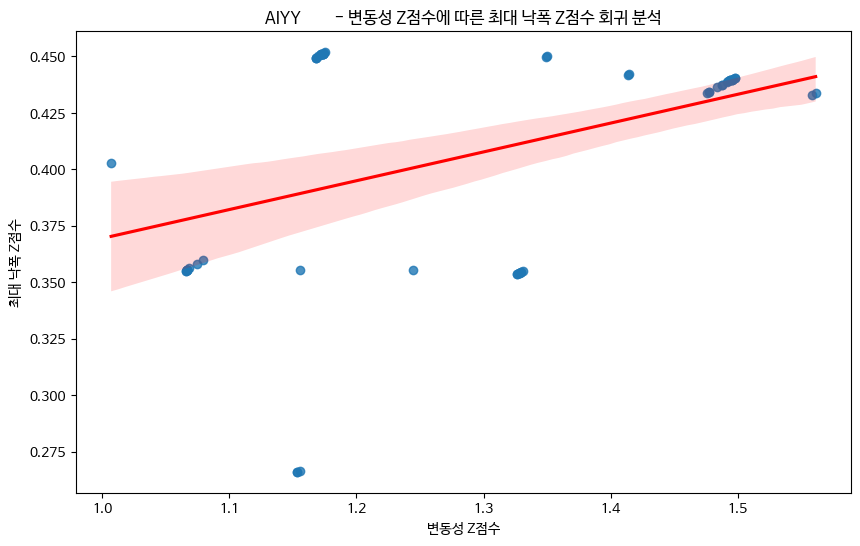

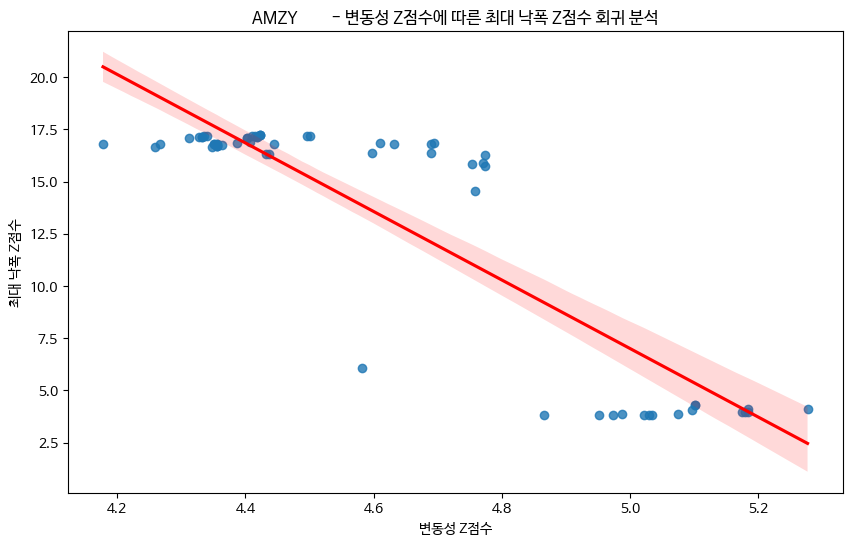

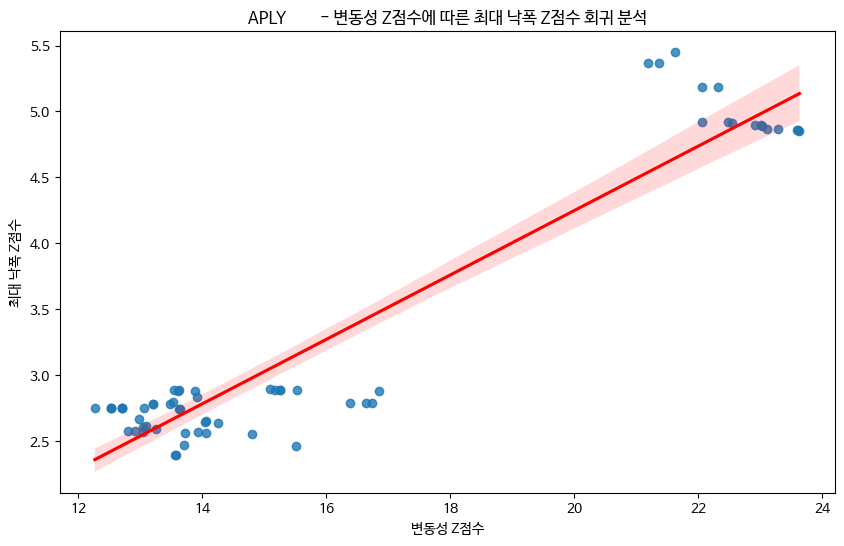

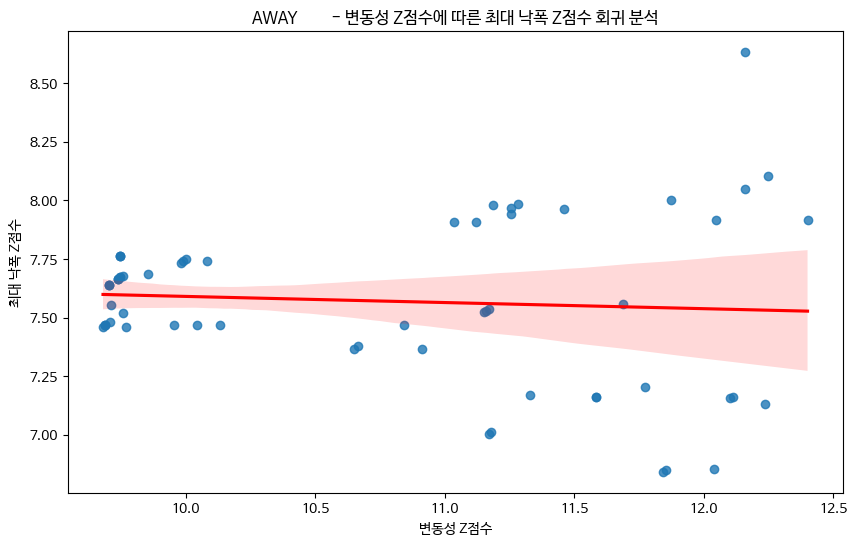

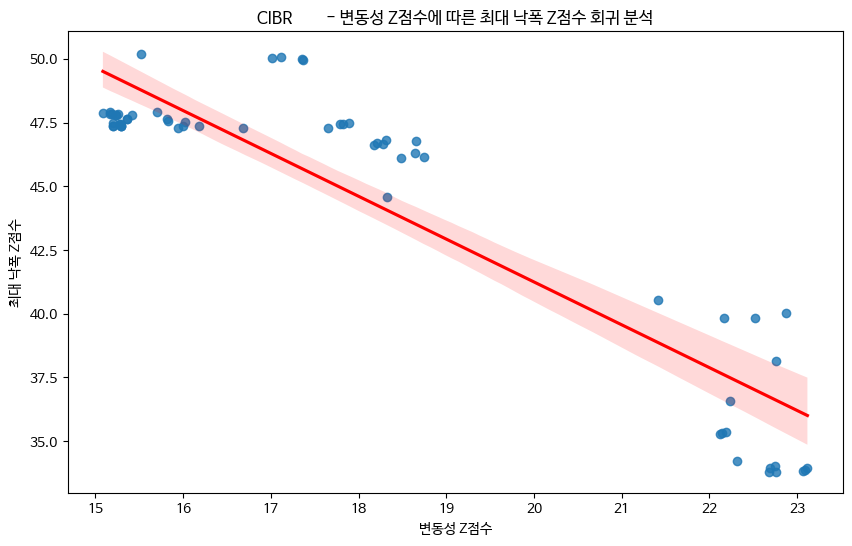

In [207]:
# 현재 항목이 많기 때문에 상위 5개 종목에 대해 회귀선 그리기
for i, (ticker, group) in enumerate(grouped):
    if i == 5:  # 상위 5개 종목까지만 그래프 그리기
        break    
    plt.figure(figsize=(10, 6))
    sns.regplot(x='vty_z_sor', y='mxdd_z_sor', data=group, line_kws={'color': 'red'})
    plt.title(f'{ticker} - 변동성 Z점수에 따른 최대 낙폭 Z점수 회귀 분석')
    plt.xlabel('변동성 Z점수')
    plt.ylabel('최대 낙폭 Z점수')
    plt.show()


In [211]:
# 상관계수가 양수 또는 음수인 종목을 분류하는 코드
positive_corr_tickers = []
negative_corr_tickers = []

# 종목별로 그룹화하여 상관계수 계산 및 분류
for ticker, group in grouped:
    corr_value = group[['vty_z_sor', 'mxdd_z_sor']].corr().iloc[0, 1]
    
    if corr_value > 0:
        positive_corr_tickers.append((ticker, corr_value))
    elif corr_value < 0:
        negative_corr_tickers.append((ticker, corr_value))

# 결과 출력
print("상관계수가 양수인 종목들:")
for ticker, corr in positive_corr_tickers:
    print(f'{ticker}: 상관계수 = {corr:.2f}')

print("\n상관계수가 음수인 종목들:")
for ticker, corr in negative_corr_tickers:
    print(f'{ticker}: 상관계수 = {corr:.2f}')


상관계수가 양수인 종목들:
AIYY        : 상관계수 = 0.41
APLY        : 상관계수 = 0.95
DGRO        : 상관계수 = 0.87
DIV         : 상관계수 = 0.80
IHI         : 상관계수 = 0.79
IJH         : 상관계수 = 0.32
JEPI        : 상관계수 = 0.24
JEPQ        : 상관계수 = 0.88
KLIP        : 상관계수 = 0.18
KRE         : 상관계수 = 0.56
MGK         : 상관계수 = 0.76
MOAT        : 상관계수 = 0.86
MSOS        : 상관계수 = 0.89
NOBL        : 상관계수 = 0.78
NVDY        : 상관계수 = 0.20
OARK        : 상관계수 = 0.63
QQQ         : 상관계수 = 0.80
QQQM        : 상관계수 = 0.77
RYLD        : 상관계수 = 0.65
SCHD        : 상관계수 = 0.67
SMH         : 상관계수 = 0.90
SOXQ        : 상관계수 = 0.87
SOXX        : 상관계수 = 0.89
SPHD        : 상관계수 = 0.93
SPYD        : 상관계수 = 0.79
SPYG        : 상관계수 = 0.84
SPYV        : 상관계수 = 0.87
TSLY        : 상관계수 = 0.59
VIG         : 상관계수 = 0.13
VYM         : 상관계수 = 0.23
XBI         : 상관계수 = 0.81
XLF         : 상관계수 = 0.67
XLK         : 상관계수 = 0.83
XLP         : 상관계수 = 0.84
XLU         : 상관계수 = 0.85

상관계수가 음수인 종목들:
AMZY        : 상관계수 = -0.89
AWAY        : 상관계수 = -0.07
CIBR 

### 변동성 Z점수와 최대 낙폭 Z점수 상관관계 해석

### 1. 상관계수가 양수인 경우
- **의미**: `변동성 Z점수`가 증가할수록 `최대 낙폭 Z점수`도 증가하는 경향을 보임.
- **해석**: 변동성이 큰 종목일수록 최대 낙폭도 더 큰 경향이 있다는 의미함. 즉, 주가 변동이 심한 ETF일수록 한 번 하락할 때 큰 낙폭을 경험할 가능성이 큼.
- **투자 관점**: 이러한 종목들은 위험이 높아, **공격적인 투자자**들에게는 더 매력적일 수 있음. 하지만 동시에 손실 위험도 크므로 신중한 리스크 관리가 필요함.

### 2. 상관계수가 음수인 경우
- **의미**: `변동성 Z점수`가 증가할수록 `최대 낙폭 Z점수`는 감소하는 경향을 보임.
- **해석**: 변동성이 큰 종목일수록 상대적으로 최대 낙폭은 작아진다는 의미임. 변동성은 크지만 가격 하락 시 큰 낙폭을 경험하지 않는 종목들이 있다는 것을 나타냄.
- **투자 관점**: 이러한 종목들은 변동성은 높아도 큰 손실을 경험할 위험은 적을 수 있음. 따라서, 일정한 변동성을 활용해 **수익을 추구하는 투자 전략**에 적합할 수 있음.

### 차이점 요약
- **양수 상관관계**: 변동성과 낙폭이 동시에 커지며, 위험도 높지만 수익 기회가 더 큼.
- **음수 상관관계**: 변동성은 있지만, 하락할 때 큰 손실을 보지 않는 종목으로 상대적으로 안정성이 있음.

### 투자 전략
- **공격적인 투자자**: 양수 상관관계 종목에 관심을 가질 가능성이 높음.
- **방어적인 투자자**: 음수 상관관계 종목을 선호할 가능성이 높음.


## 08. 볼린저밴드
- 볼린저 밴드를 활용하여 매수/매도 시점을 결정하는 것에 도움을 주고자 한다.

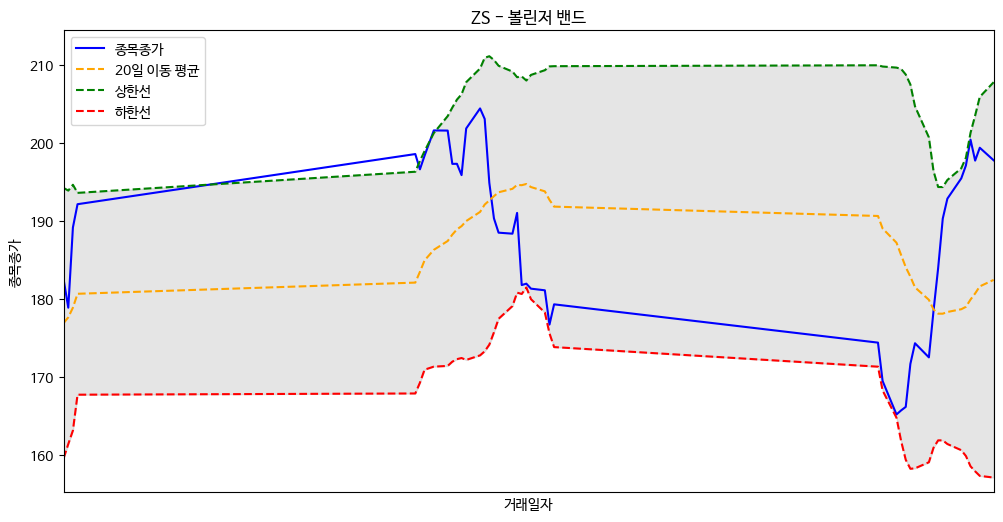

ZS 종가 데이터:
            거래일자    종목종가
194768  20240729  181.15
194769  20240604  169.14
194770  20240621  179.55
194771  20240614  184.22
194772  20240607  180.99
194773  20240705  201.65
194774  20240628  192.19
194775  20240710  197.37
194776  20240723  191.07
194777  20240626  178.92


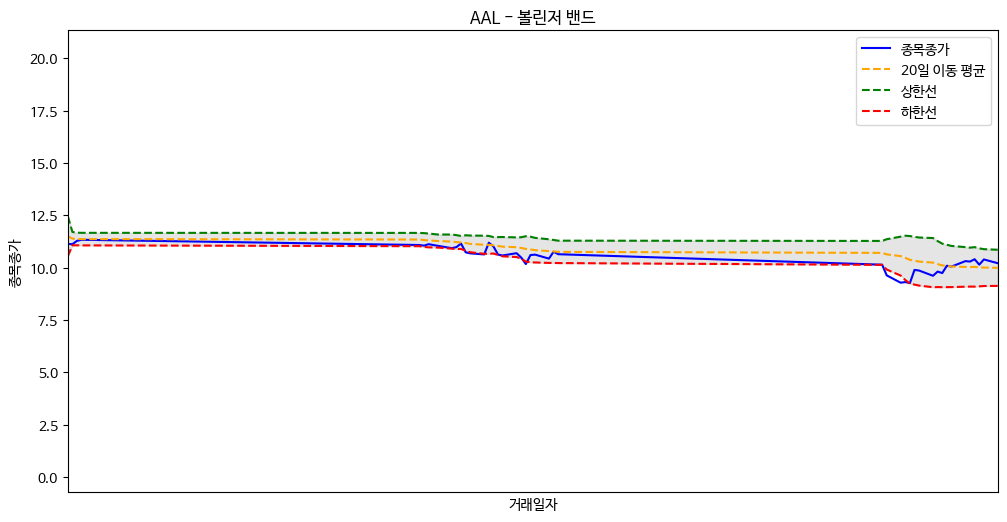

AAL 종가 데이터:
       거래일자   종목종가
0  20240722  10.69
1  20240603  11.53
2  20240531  11.50
3  20240625  11.13
4  20240605  11.62
5  20240611  11.28
6  20240823  10.39
7  20240528  13.44
8  20240726  10.62
9  20240730  10.76


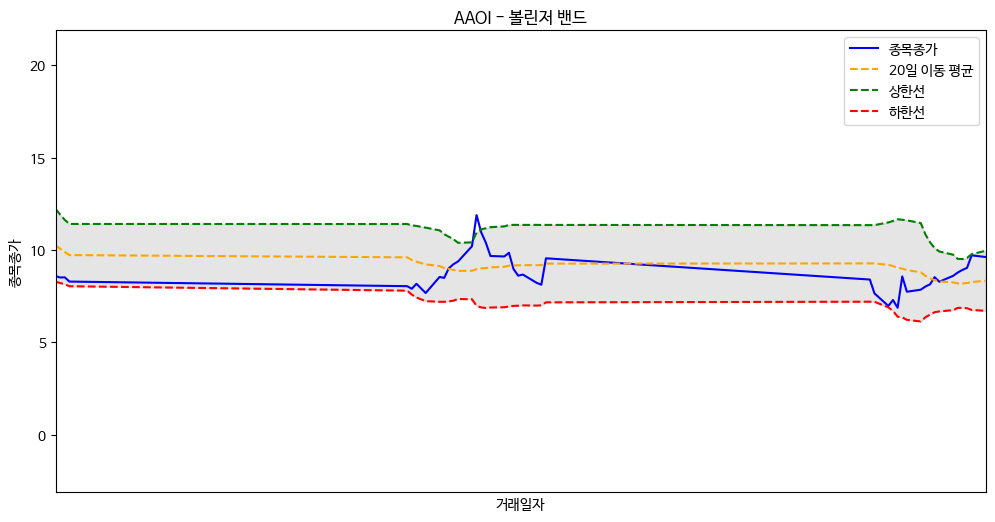

AAOI 종가 데이터:
        거래일자    종목종가
63  20240821   8.920
64  20240531  10.490
65  20240627   8.520
66  20240809   7.740
67  20240718  10.400
68  20240816   8.280
69  20240719   9.675
70  20240801   8.400
71  20240822   9.030
72  20240529  11.980


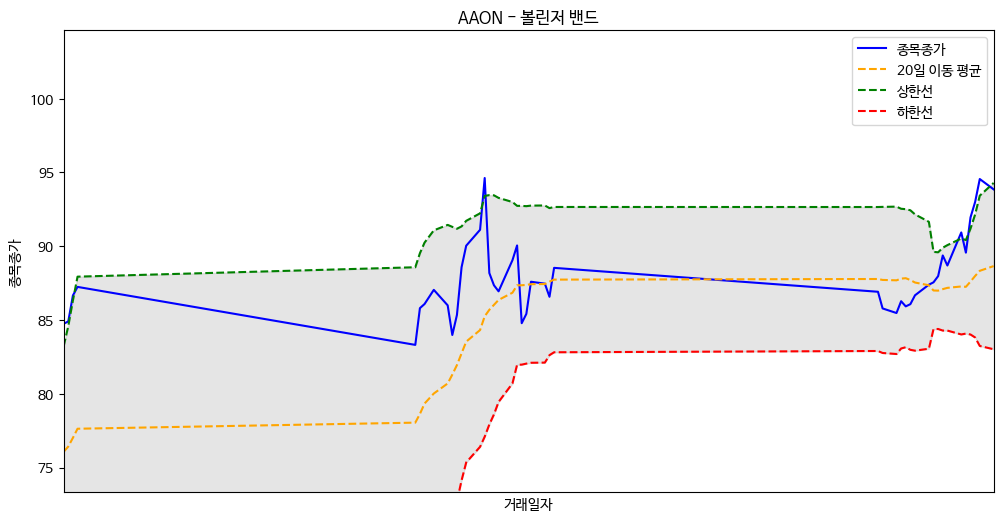

AAON 종가 데이터:
         거래일자   종목종가
126  20240617  79.41
127  20240716  94.62
128  20240612  74.13
129  20240807  85.92
130  20240724  84.78
131  20240702  85.80
132  20240725  85.41
133  20240731  88.53
134  20240620  80.25
135  20240613  75.39


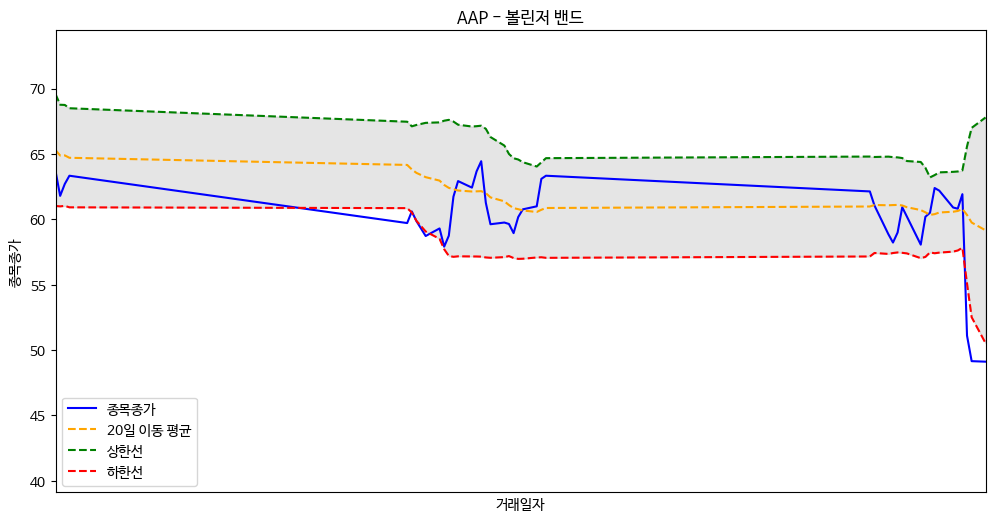

AAP 종가 데이터:
         거래일자   종목종가
189  20240710  58.74
190  20240530  66.96
191  20240626  61.79
192  20240618  64.28
193  20240607  64.58
194  20240711  61.73
195  20240604  65.21
196  20240705  58.72
197  20240729  60.99
198  20240628  63.33


In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 상위 5개 티커 종목 선택
top_tickers = STK_DT_QUT['티커종목코드'].value_counts().nlargest(5).index

# 볼린저 밴드 계산 및 시각화
def plot_bollinger_bands(df, ticker, n=20, k=2):
    df = df[['거래일자', '종목종가']].copy()
    df['거래일자'] = pd.to_datetime(df['거래일자'])
    
    # 거래일자를 기준으로 오름차순 정렬
    df.sort_values('거래일자', inplace=True)
    df.set_index('거래일자', inplace=True)

    # 이동 평균 및 표준 편차 계산
    df['ma'] = df['종목종가'].rolling(n).mean()
    df['std'] = df['종목종가'].rolling(n).std()
    
    # 상한선 및 하한선 계산
    df['upperb'] = df['ma'] + (df['std'] * k)
    df['lowerb'] = df['ma'] - (df['std'] * k)

    df = df[n-1:].copy()  # 첫 n-1개 행은 NaN이므로 제거

    # 그래프 그리기
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['종목종가'], label='종목종가', color='blue')
    plt.plot(df.index, df['ma'], label=f'{n}일 이동 평균', linestyle='dashed', color='orange')
    plt.plot(df.index, df['upperb'], label='상한선', linestyle='dashed', color='green')
    plt.plot(df.index, df['lowerb'], label='하한선', linestyle='dashed', color='red')
    plt.fill_between(df.index, df['lowerb'], df['upperb'], color='gray', alpha=0.2)

    # y축 범위 설정
    plt.ylim(df['종목종가'].min() - 10, df['종목종가'].max() + 10)

    plt.title(f'{ticker} - 볼린저 밴드')
    plt.xlabel('거래일자')
    plt.ylabel('종목종가')
    plt.xlim(df.index[0], df.index[-1])
    plt.legend()
    plt.show()

# 각 티커에 대해 볼린저 밴드 계산 및 시각화
for ticker in top_tickers:
    group = STK_DT_QUT[STK_DT_QUT['티커종목코드'] == ticker]
    plot_bollinger_bands(group, ticker)

    # 가격 데이터 확인
    print(f"{ticker} 종가 데이터:")
    print(group[['거래일자', '종목종가']].head(10))


- **가격이 상한 밴드를 초과할 경우**: 주가가 과매수 상태에 진입했음을 나타내며, 이는 가격 조정 또는 하락의 신호로 해석될 수 있음.

- **가격이 하한 밴드 아래로 하락할 경우**: 주가가 과매도 상태에 진입했음을 나타내며, 이는 가격 반등의 신호로 해석될 수 있음

- **밴드 간격**: 볼린저 밴드의 폭이 넓어질수록 주가의 변동성이 증가하고 있음을 나타내며, 밴드가 좁아질수록 주가의 변동성이 감소하고 있음을 나타냄. 

- **가격이 이동 평균선 근처에 있을 때**: 주가는 안정세를 보이고 있으며, 특별한 추세가 나타나지 않고 있음을 나타냄.